In [1]:
import os
import gc
from functools import partial, wraps
from datetime import datetime as dt
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb

In [2]:
sub_all=pd.read_csv('lgbm_pred_2bags.csv')
sub1=pd.read_csv('0.915573889656764_train_all_data.csv')

sub_all['target']=(10/11)*sub_all['target']+(1/11)*sub1['target']

sub_all.to_csv('final.csv',index=False)

In [3]:
train_df=pd.read_csv('input/train.csv').round(4)
test_df=pd.read_csv('input/test.csv').round(4)

In [4]:
ftz=['var_7','var_10','var_14','var_17','var_27','var_30','var_38','var_41','var_47','var_84','var_98','var_100','var_103','var_120','var_124','var_126','var_136','var_140','var_158','var_161','var_185']

test_fake=['var_0', 'var_5', 'var_10', 'var_11', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_24', 'var_30', 'var_35', 'var_38', 'var_39', 'var_40',
       'var_41', 'var_44', 'var_45', 'var_47', 'var_48', 'var_49',
       'var_51', 'var_52', 'var_54', 'var_55', 'var_58', 'var_60',
       'var_61', 'var_65', 'var_67', 'var_70', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_80', 'var_82', 'var_83',
       'var_84', 'var_86', 'var_87', 'var_89', 'var_90', 'var_92',
       'var_96', 'var_97', 'var_100', 'var_101', 'var_102', 'var_106',
       'var_107', 'var_110', 'var_113', 'var_117', 'var_118', 'var_119',
       'var_120', 'var_122', 'var_123', 'var_124', 'var_135', 'var_136',
       'var_137', 'var_138', 'var_139', 'var_140', 'var_141', 'var_142',
       'var_145', 'var_146', 'var_147', 'var_149', 'var_151', 'var_152',
       'var_154', 'var_155', 'var_158', 'var_159', 'var_160', 'var_163',
       'var_167', 'var_168', 'var_170', 'var_171', 'var_172', 'var_173',
       'var_174', 'var_176', 'var_178', 'var_179', 'var_182', 'var_183',
       'var_184', 'var_186', 'var_187', 'var_190', 'var_191', 'var_193',
       'var_196', 'var_199']

train_fake=['var_0', 'var_5', 'var_10', 'var_11', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_24', 'var_30', 'var_35', 'var_36', 'var_38', 'var_39',
       'var_40', 'var_41', 'var_44', 'var_45', 'var_46', 'var_47',
       'var_48', 'var_49', 'var_51', 'var_52', 'var_54', 'var_55',
       'var_58', 'var_60', 'var_61', 'var_65', 'var_67', 'var_70',
       'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_80',
       'var_82', 'var_83', 'var_84', 'var_86', 'var_87', 'var_89',
       'var_90', 'var_92', 'var_96', 'var_97', 'var_100', 'var_101',
       'var_102', 'var_106', 'var_107', 'var_110', 'var_113', 'var_117',
       'var_118', 'var_119', 'var_120', 'var_122', 'var_123', 'var_124',
       'var_135', 'var_136', 'var_137', 'var_138', 'var_139', 'var_140',
       'var_141', 'var_142', 'var_145', 'var_146', 'var_147', 'var_149',
       'var_151', 'var_152', 'var_154', 'var_155', 'var_158', 'var_159',
       'var_160', 'var_163', 'var_167', 'var_168', 'var_170', 'var_171',
       'var_172', 'var_173', 'var_174', 'var_176', 'var_178', 'var_182',
       'var_183', 'var_184', 'var_186', 'var_187', 'var_190', 'var_191',
       'var_193', 'var_196', 'var_199']

cnt_ftr=[ 'var_5', 'var_7', 'var_8',
       'var_10', 'var_11', 'var_17',
       'var_18', 'var_19', 'var_20',
        'var_24', 'var_29',
       'var_30', 'var_33', 'var_35', 'var_36',
       'var_38', 'var_39', 'var_40', 'var_41',
        'var_45', 'var_47', 'var_48',
       'var_49', 'var_51', 'var_52', 'var_54',
       'var_55', 'var_58', 'var_60', 'var_61',
       'var_63', 'var_65', 'var_67', 'var_69',
       'var_70', 'var_72', 'var_73', 'var_74',
       'var_75', 'var_77',
       'var_82', 'var_83', 'var_84', 'var_85',
       'var_86', 'var_87', 'var_89', 'var_90',
       'var_92', 'var_96', 'var_97', 'var_100',
       'var_101', 'var_102', 'var_107',
       'var_113', 'var_117', 'var_118',
       'var_119', 'var_120', 'var_122', 'var_123',
       'var_124', 'var_127', 'var_128', 'var_129',
       'var_134', 'var_135', 'var_136', 'var_137',
       'var_138', 'var_140', 'var_141',
       'var_142', 'var_145', 'var_147', 'var_149',
       'var_151', 'var_152', 'var_154', 'var_155',
       'var_157', 'var_158', 'var_159', 'var_160',
       'var_163', 'var_164', 'var_167',
       'var_168', 'var_170', 'var_171', 'var_172',
       'var_173', 'var_176', 'var_178',
       'var_180', 'var_182', 'var_183', 'var_184',
       'var_185', 'var_187', 'var_188',
       'var_191', 'var_193', 'var_194', 'var_196',
       'var_199']


rmv_fakes = [f for f in train_df.columns if f not in ['ID_code', 'target']+train_fake]

rest = [f for f in train_df.columns if f not in ['ID_code', 'target']]

In [5]:
train_df.replace(train_df['var',np.nan)

SyntaxError: invalid syntax (<ipython-input-5-4f1c974bc1e1>, line 1)

In [6]:
from tqdm import tqdm

def get_fake(df):
    df_test = df.values.copy()

    unique_samples = []
    unique_count = np.zeros_like(df_test)
    for feature in tqdm(range(df_test.shape[1])):
        _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
        unique_count[index_[count_ == 1], feature] += 1

    # Samples which have unique values are real the others are fake
    real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
    synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]
    
    return (real_samples_indexes,synthetic_samples_indexes,unique_count)

In [7]:
real_samples_indexes,synthetic_samples_indexes,_=get_fake(test_df[rest])

100%|██████████| 200/200 [00:05<00:00, 35.85it/s]


In [8]:
#rest = [f for f in train_df.columns if f not in ['ID_code', 'target']+ftz]
train_label=train_df['target']
train_df=train_df[rest]
test_df=test_df[rest]
print(train_df.shape)

(200000, 200)


In [9]:
df_all=pd.concat([train_df,test_df.iloc[real_samples_indexes,:]],axis=0)
print(df_all.shape)

(300000, 200)


In [12]:
### from tqdm import tqdm
from scipy.stats.mstats import *

def FE_1(tr,columns,suf):
    df=tr.copy()
    size=tr.shape[0]
    num_bins=[1]
    rounds=[4]
    for f in tqdm(columns):
        
        for k,j in enumerate(num_bins):
            dic=dict()
            _,bins=pd.cut(df[f].round(rounds[k]),bins=j,retbins=True)
            tmp=df[f]
            for i in range(j):
                res=tmp[(tmp>bins[i])&(tmp<=bins[i+1])]
                res=(res.value_counts())
                dic = {**dic, **res.to_dict()}
            df[f+suf+'_'+str(rounds[k])]=tmp.map(dic)
        #rac,_=np.modf(df[f]*100)
        #tmp=np.abs(frac)*100
        #df[f+suf+'frac100']=tmp.map(tmp.value_counts())
        
        #frac,_=np.modf(df[f]*10)
        #tmp=np.abs(frac)*1000
        #df[f+suf+'frac1000']=tmp.map(tmp.value_counts())
        #tmp=df[f].sort_values()
        #dic=dict(zip(tmp,np.concatenate([np.diff(tmp).round(4),[0]])))
        #df[f+'diff']=df[f].map(dic)
        
        #df[f+suf+'cut']=pd.cut(df[f],100,labels=False)
        #df[f+suf+'cut']=df[f+suf+'cut'].map(df[f+suf+'cut'].value_counts())
        #df[f+suf+'_win']=tmp.map(tmp.value_counts())
        #df[f+suf+'cum']=df[f+suf+'_c'].groupby(by=[f+suf+'_c']).cumcount()
        
    '''
    col=[f for f in df.columns if f.endswith(suf)]
    
    df['mean'+suf]=df[col].mean(axis=1)
    df['gmean'+suf]=gmean(df[col],axis=1)
    #df['hmean'+suf]=hmean(df[col],axis=1)
    
    #df['hmean'+suf]=kstat(df[col],axis=1)
    
    df['std'+suf]=df[col].std(axis=1)
    #df['min']=df[col].min(axis=1)
    df['max'+suf]=df[col].max(axis=1)
    #df['0.1']=df[col].quantile(0.1,axis=1)
    #df['0.25']=df[col].quantile(0.25,axis=1)
    df['0.5'+suf]=df[col].quantile(0.5,axis=1)
    #df['0.6'+suf]=df[col].quantile(0.6,axis=1)
    df['0.75'+suf]=df[col].quantile(0.75,axis=1)
    #df['0.7']=df[col].quantile(0.7,axis=1)
    #df['0.8']=df[col].quantile(0.8,axis=1)
    df['0.9'+suf]=df[col].quantile(0.9,axis=1)
    #df['0.92'+suf]=df[col].quantile(0.92,axis=1)
    df['0.95'+suf]=df[col].quantile(0.95,axis=1)
    '''
    '''
    suf=suf+'_c'
    df['mean'+suf]=df[col].mean(axis=1)
    df['gmean'+suf]=gmean(df[col],axis=1)
    
    df['std'+suf]=df[col].std(axis=1)
    #df['min']=df[col].min(axis=1)
    df['max'+suf]=df[col].max(axis=1)
    #df['0.1']=df[col].quantile(0.1,axis=1)
    #df['0.25']=df[col].quantile(0.25,axis=1)
    #df['0.5'+suf]=df[col].quantile(0.5,axis=1)
    #df['0.6'+suf]=df[col].quantile(0.6,axis=1)
    df['0.75'+suf]=df[col].quantile(0.75,axis=1)
    df['0.7']=df[col].quantile(0.7,axis=1)
    #df['0.8']=df[col].quantile(0.8,axis=1)
    df['0.9'+suf]=df[col].quantile(0.9,axis=1)
    #df['0.92'+suf]=df[col].quantile(0.92,axis=1)
    #df['0.95'+suf]=df[col].quantile(0.95,axis=1)
    '''
    return df

In [9]:
from tqdm import tqdm

def FE_2(tr,columns):
    df=tr.copy()
    
    cnt=pd.DataFrame(df.values.ravel())[0].value_counts()
    for f in tqdm(columns):
        df[f+'_c']=df[f].map(cnt)
        
    col=[f for f in df.columns if f.endswith('_c')]
    df['mean']=df[col].mean(axis=1)
    df['std']=df[col].std(axis=1)
    #df['min']=df[col].min(axis=1)
    df['max']=df[col].max(axis=1)
    #df['0.1']=df[col].quantile(0.1,axis=1)
    df['0.25']=df[col].quantile(0.25,axis=1)
    df['0.5']=df[col].quantile(0.5,axis=1)
    df['0.75']=df[col].quantile(0.75,axis=1)
    df['0.8']=df[col].quantile(0.8,axis=1)
    df['0.9']=df[col].quantile(0.9,axis=1)
    
    

    return df

In [10]:
from tqdm import tqdm
from scipy.stats.mstats import *

def FE_3 (tr,columns1,columns2,suf):
    
    df=tr.copy()
    unq=[]
    for f in tqdm(columns1):
        unq.append(train_df[f].unique())
    flat_unq = [item for sublist in unq for item in sublist]
    cnt=pd.Series(flat_unq).value_counts()
    for f in tqdm(columns2):
            df[f+suf]=df[f].map(cnt)
     
    col=[f for f in df.columns if f.endswith(suf)]
    df['mean'+suf]=df[col].mean(axis=1)
    df['gmean'+suf]=gmean(df[col],axis=1)
    #df['hmean'+suf]=hmean(df[col],axis=1)
    
    #df['hmean'+suf]=kstat(df[col],axis=1)
    
    df['std'+suf]=df[col].std(axis=1)
    #df['min']=df[col].min(axis=1)
    df['max'+suf]=df[col].max(axis=1)
    #df['0.1']=df[col].quantile(0.1,axis=1)
    #df['0.25']=df[col].quantile(0.25,axis=1)
    df['0.5'+suf]=df[col].quantile(0.5,axis=1)
    df['0.6'+suf]=df[col].quantile(0.6,axis=1)
    df['0.75'+suf]=df[col].quantile(0.75,axis=1)
    df['0.7']=df[col].quantile(0.7,axis=1)
    df['0.8']=df[col].quantile(0.8,axis=1)
    df['0.9'+suf]=df[col].quantile(0.9,axis=1)
    df['0.95'+suf]=df[col].quantile(0.95,axis=1)
            
    return df
    

In [11]:
from tqdm import tqdm
from scipy.stats.mstats import *

def FE_4(tr,columns,suf):
    df=tr.copy()
    size=tr.shape[0]
    
    
    for f in tqdm(columns):
        #df[f+suf]=df.groupby(f).cumcount()
        df[f[0]+f[1]+suf]=df.groupby(by=f)[f[0]].transform('count')
        

    col=[f for f in df.columns if f.endswith(suf)]
    df['mean'+suf]=df[col].mean(axis=1)
    df['gmean'+suf]=gmean(df[col],axis=1)
    #df['hmean'+suf]=hmean(df[col],axis=1)
    
    #df['hmean'+suf]=kstat(df[col],axis=1)
    
    df['std'+suf]=df[col].std(axis=1)
    #df['min']=df[col].min(axis=1)
    df['max'+suf]=df[col].max(axis=1)
    #df['0.1']=df[col].quantile(0.1,axis=1)
    #df['0.25']=df[col].quantile(0.25,axis=1)
    df['0.5'+suf]=df[col].quantile(0.5,axis=1)
    #df['0.6'+suf]=df[col].quantile(0.6,axis=1)
    df['0.75'+suf]=df[col].quantile(0.75,axis=1)
    #df['0.7']=df[col].quantile(0.7,axis=1)
    #df['0.8']=df[col].quantile(0.8,axis=1)
    #df['0.9'+suf]=df[col].quantile(0.9,axis=1)
    #df['0.95'+suf]=df[col].quantile(0.95,axis=1)

    return df

In [12]:
import itertools
permut=['var_41_FE1','var_45_FE1', 'var_61_FE1', 'var_74_FE1', 'var_96_FE1',
       'var_97_FE1', 'var_100_FE1', 'var_120_FE1', 'var_136_FE1',
       'var_158_FE1', 'var_160_FE1', 'var_187_FE1', 'var_199_FE1']
permut=list(itertools.combinations(permut, 2))


In [9]:
cats=['var_5', 'var_11', 'var_17', 'var_18',
       'var_19', 'var_21', 'var_30', 'var_40',
       'var_45', 'var_47', 'var_48', 'var_49',
       'var_51', 'var_54', 'var_61', 'var_67',
       'var_70', 'var_73', 'var_74', 'var_80',
       'var_82', 'var_83', 'var_84', 'var_86',
       'var_90', 'var_96', 'var_97', 'var_100',
       'var_101', 'var_102', 'var_117', 'var_118',
       'var_120', 'var_135', 'var_136', 'var_137',
       'var_139', 'var_141', 'var_142', 'var_147',
       'var_149', 'var_155', 'var_158', 'var_160',
       'var_167', 'var_173', 'var_176', 'var_178',
       'var_180', 'var_182', 'var_184', 'var_185',
       'var_187', 'var_196', 'var_199'] # <=10


cats=['var_3', 'var_4', 'var_6', 'var_9', 'var_12',
       'var_15', 'var_23', 'var_25', 'var_27',
       'var_28', 'var_31', 'var_34', 'var_37',
       'var_42', 'var_43', 'var_50', 'var_53',
       'var_57', 'var_59', 'var_62', 'var_64',
       'var_66', 'var_68', 'var_71', 'var_78',
       'var_79', 'var_81', 'var_91', 'var_93',
       'var_95', 'var_98', 'var_99', 'var_103',
       'var_104', 'var_105', 'var_106', 'var_108',
       'var_111', 'var_112', 'var_114', 'var_115',
       'var_116', 'var_121', 'var_125', 'var_126',
       'var_130', 'var_131', 'var_132', 'var_133',
       'var_144', 'var_146', 'var_148', 'var_150',
       'var_156', 'var_161', 'var_162', 'var_166',
       'var_169', 'var_175', 'var_181', 'var_189',
       'var_192', 'var_195', 'var_197'] # rest>16

cats=['var_1', 'var_5', 'var_7', 'var_10', 'var_11',
       'var_13', 'var_17', 'var_18', 'var_19',
       'var_20', 'var_21', 'var_24', 'var_26',
       'var_30', 'var_33', 'var_35', 'var_38',
       'var_39', 'var_40', 'var_41', 'var_44',
       'var_45', 'var_47', 'var_48', 'var_49',
       'var_51', 'var_52', 'var_54', 'var_55',
       'var_58', 'var_60', 'var_61', 'var_63',
       'var_65', 'var_67', 'var_69', 'var_70',
       'var_72', 'var_73', 'var_74', 'var_75',
       'var_76', 'var_77', 'var_80', 'var_82',
       'var_83', 'var_84', 'var_85', 'var_86',
       'var_87', 'var_90', 'var_92', 'var_96',
       'var_97', 'var_100', 'var_101', 'var_102',
       'var_107', 'var_109', 'var_113', 'var_117',
       'var_118', 'var_119', 'var_120', 'var_122',
       'var_123', 'var_128', 'var_129', 'var_134',
       'var_135', 'var_136', 'var_137', 'var_138',
       'var_139', 'var_140', 'var_141', 'var_142',
       'var_145', 'var_147', 'var_149', 'var_151',
       'var_154', 'var_155', 'var_157', 'var_158',
       'var_159', 'var_160', 'var_163', 'var_164',
       'var_165', 'var_167', 'var_168', 'var_171',
       'var_172', 'var_173', 'var_174', 'var_176',
       'var_178', 'var_180', 'var_182', 'var_183',
       'var_184', 'var_185', 'var_187', 'var_188',
       'var_193', 'var_196', 'var_199'] #<14

In [13]:
#cols_=train_df.columns
cols_FE1=rest#[f for f in train_df.columns if f not in cats]
#cols_FE3=rest
#cols_FE4=permut
#df_all=FE_3(df_all,cols_FE3,rest,'_FE3')
df_all=FE_1(df_all,cols_FE1,'_FE1')
#df_all=FE_4(df_all,cols_FE4,'_FE4')
#fake_test=FE_3(test_df.iloc[synthetic_samples_indexes,:],cols_FE3,rest,'_FE3')
#fake_test=FE_1(test_df.iloc[synthetic_samples_indexes,:],cols_FE1,'_FE1')
#fake_test=FE_4(test_df.iloc[synthetic_samples_indexes,:],cols_FE4,'_FE4')
#test_df=FE_3(test_df,cols_FE3,rest,'_FE3')
#test_df=FE_1(test_df,cols_FE1,'_FE1')
#test_df=FE_4(test_df,cols_FE4,'_FE4')
#print(fake_test.shape)
#print(test_df.shape)
#print(df_all.shape)

100%|██████████| 200/200 [00:54<00:00,  2.20it/s]


In [14]:
from gc import collect

train_df=df_all.iloc[:200000,:]
#test_df.iloc[real_samples_indexes,:]=df_all.iloc[200000:,:]
#test_df.iloc[synthetic_samples_indexes,:]=fake_test

#del df_all,fake_test
#gc.collect()

#print(train_df.shape)
#print(test_df.shape)

In [16]:
train_df=train_df.replace(1,np.nan)

In [17]:
train_df

var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081   5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588   5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805   7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522   7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746   6.6375  12.2772   2.4486  5.9405  19.2514   
5       11.4763 -2.3182  12.6080   8.6264  10.9621   3.5609  4.5322  15.2255   
6       11.8091 -0.0832   9.3494   4.2916  11.1355  -8.0198  6.1961  12.0771   
7       13.5580 -7.9881  13.8776   7.5985   8.6543   0.8310  5.6890  22.3262   
8       16.1071  2.4426  13.9307   5.6327   8.8014   6.1630  4.4514  10.1854   
9       12.5088  1.9743   8.8960   5.4508  13.6043 -16.2859  6.0637  16.8410   
10       5.0702 -0.5447   9.5900   4.2987  12.3910 -18.8687  6.0382  14.3797   
11      12.7188 -7.9750  10.3757   9.0101  12.8570 -12.0852  5.6464  11.8370   
12       8.7671 -4.6154   9.7242   7.4242   9.0254   1.4247  6.2815  12.3143   
13      16.3699  1.5934  16.7395   7.3330  12.1450   5.9004  4.8222  20.9729   
14      13.8080  5.0514  17.2611   8.5120  12.8517  -9.1622  5.7327  21.0517   
15       3.9416  2.6562  13.3633   6.8895  12.2806 -16.1620  5.6979  14.4573   
16       5.0615  0.2689  15.1325   3.6587  13.5276  -6.5477  5.2757   9.8710   
17       8.4199 -1.8128   8.1202   5.3955   9.7184 -17.8390  4.0959  15.2860   
18       4.8750  1.2646  11.9190   8.4650  10.7203  -0.6707  5.6103  16.4661   
19       4.4090 -0.7863  15.1828   8.0631  11.2831  -0.7356  6.3801  16.0218   
20      12.6700 -2.0221   6.8930   6.9152   9.5677 -11.2672  5.6061  16.2354   
21       8.3918  1.4806  12.9804   7.5538  11.1531 -14.7776  5.9987  15.5148   
22      10.2031  0.1925  14.0238   7.0345  11.8514  13.8830  6.4040  18.0058   
23      15.0029 -9.3439  10.3790   8.3226  13.0204  -5.0744  5.2489  11.6845   
24       5.9240 -3.7285  11.0995   4.6969  11.7363 -20.4102  5.8125  15.9027   
25       8.2703 -5.6854  12.6862   7.2755  12.3713  -7.7521  6.7252  18.4270   
26      15.6567 -4.4950  10.4867   3.8187   8.8813  -6.0295  5.5224  17.6964   
27      10.7166 -9.9800  10.9569   6.7660  10.6803 -12.9329  4.5012  17.3841   
28       7.8010  4.5262   8.9291   8.4884  12.8435  -1.2632  5.0383  13.6339   
29       5.3301 -2.6064  13.1913   3.1193   6.6483  -6.5659  5.9064  15.2341   
...         ...     ...      ...      ...      ...      ...     ...      ...   
199970  15.5794 -2.5687   9.8811   4.2565  10.7471  -2.9749  6.2631  19.6539   
199971  14.5745 -3.9178  13.1673   9.2800  10.9593   7.7317  5.1604  14.8811   
199972   7.4206 -2.5972  12.0215   8.7882  14.1996   0.0649  4.7421  19.9268   
199973   8.7758 -0.4604   8.0874   6.4538  13.0035   0.1872  4.3495  20.0410   
199974  16.2010 -5.7847  15.2685   6.5241  11.6020  -7.3137  5.7833  18.4535   
199975   7.5238  1.0548   9.6265   4.8688   7.1841 -16.4001  5.3361  13.1120   
199976   7.9663 -2.8485   9.0919   7.3298   9.6690 -16.7872  4.5094  12.4351   
199977   7.3884 -0.8093   8.9274   7.7227  14.3232 -11.3203  5.2290  12.0626   
199978  12.2015 -0.8787  16.8069   9.1073  10.3219   7.0208  6.2587  19.8344   
199979  10.8208 -2.9344  15.0906   9.7810   9.4014  -4.5704  5.3201  16.0858   
199980   7.9618  6.2271  13.3326   7.5345  12.5645   1.1205  5.4488  22.1532   
199981  12.8140  0.6386  14.1657   7.1044   8.9365  -0.3274  6.5949  14.6078   
199982  11.8224 -2.3596   9.5937  10.5608  11.1665  -0.7569  4.8932  19.6128   
199983  15.3063  2.8260  11.4074   4.7992  11.4529   5.3734  4.5088  15.3278   
199984  11.3184  0.3745   4.5578   5.8872  10.3655   0.7182  5.4431  17.4472   
199985   9.0249 -3.6379  12.3907   5.1915  12.1701  -8.8978  5.2574  17.9830   
199986  12.0298 -8.7800   7.7071   7.4015   9.2305 -16.2174  5.9064  17.9268   
199987   8.0438 -1.9184  13.1498   9.2027   8.9886   2.7531  4.2194  18.1138   
199988  10

In [13]:
rest=np.array(rest)
train_df['ng_count']=train_df.loc[train_df<=0,rest].sum(axis=1)
train_df['ps_count']=train_df.loc[train_df>0,rest].sum(axis=1)

test_df['ng_count']=test_df.loc[test_df<=0,rest].sum(axis=1)
test_df['ps_count']=test_df.loc[test_df>0,rest].sum(axis=1)

KeyError: "None of [Index([                    ('v', 'a', 'r', '_', '0'),\n                           ('v', 'a', 'r', '_', '1'),\n                           ('v', 'a', 'r', '_', '2'),\n                           ('v', 'a', 'r', '_', '3'),\n                           ('v', 'a', 'r', '_', '4'),\n                           ('v', 'a', 'r', '_', '5'),\n                           ('v', 'a', 'r', '_', '6'),\n                           ('v', 'a', 'r', '_', '8'),\n                           ('v', 'a', 'r', '_', '9'),\n                      ('v', 'a', 'r', '_', '1', '1'),\n       ...\n       ('g', 'm', 'e', 'a', 'n', '_', 'F', 'E', '1'),\n                 ('s', 't', 'd', '_', 'F', 'E', '1'),\n                 ('m', 'a', 'x', '_', 'F', 'E', '1'),\n                 ('0', '.', '5', '_', 'F', 'E', '1'),\n                 ('0', '.', '6', '_', 'F', 'E', '1'),\n            ('0', '.', '7', '5', '_', 'F', 'E', '1'),\n                                     ('0', '.', '7'),\n                                     ('0', '.', '8'),\n                 ('0', '.', '9', '_', 'F', 'E', '1'),\n            ('0', '.', '9', '5', '_', 'F', 'E', '1')],\n      dtype='object', length=369)] are in the [index]"

In [ ]:
# add 1-way grouping count-based features
from tqdm import tqdm
cols1=["GeoNameIdentifier","Census_OSInstallLanguageIdentifier","Census_OEMModelIdentifier","CountryIdentifier"]#
cols2=['AVProductStatesIdentifier','AVProductsInstalled' , 'Census_OSInstallTypeName','Census_OEMNameIdentifier','OrganizationIdentifier']
cols4=["Census_InternalPrimaryDisplayResolutionHorizontal","Census_ChassisTypeName","Census_OSEdition"]
cols3=['new_num_1','CountryIdentifier','CityIdentifier','OsBuildLab','Census_ProcessorModelIdentifier','Census_OSInstallLanguageIdentifier','Census_GenuineStateName','Census_InternalBatteryNumberOfCharges']
cols5=['DefaultBrowsersIdentifier','AVProductStatesIdentifier','CountryIdentifier','CityIdentifier','Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorModelIdentifier','Census_SystemVolumeTotalCapacity','Census_InternalBatteryNumberOfCharges','Census_FirmwareVersionIdentifier','primary_drive_c_ratio','non_primary_drive_MB','aspect_ratio','monitor_dims','dpi','dpi_square','MegaPixels','Screen_Area','new_num_0','new_num_1','Census_OEMModelIdentifier']
cols=list(set(cols4+cols2+cols1+cols3+cols5))
for col in tqdm(cols):
    d = pd.concat([train_df[col],test_df[col]],axis=0).value_counts().to_dict()
    train_df[col+"_c"] = train_df[col].apply(lambda x:d.get(x,0))
    test_df[col+"_c"] = test_df[col].apply(lambda x:d.get(x,0))
    del d
    gc.collect()


In [ ]:
#add 2-way grouping count-based features
cols=[[]]
for col in tqdm(cols):
    tmp=pd.concat([train_df[col],test_df[col]],axis=0).groupby(by=col)[col[0]].transform('count')
    train_df[col[0]+col[1]+'_c']=tmp.iloc[0:train_df.shape[0],]
    test_df[col[0]+col[1]+'_c']=tmp.iloc[train_df.shape[0]:,]
    del tmp
    gc.collect()

In [27]:
tmp=FE_1(df_test.iloc[synthetic_samples_indexes,:],df_test.columns)

In [18]:
train_df['std_FE4'].std()

0.013836105005212485

In [26]:
res=[]
for f in test_df.columns:
    tmp=test_df.loc[train_df[f]==10.4664,f]
    if not tmp.empty:
        res.append(f)
print(len(res))

77


15.0866    11
15.1564    11
16.4007    10
15.3578    10
15.9613    10
15.2651    10
15.6486    10
15.1556    10
17.6119     9
14.9372     9
18.6541     9
14.6348     9
16.0011     9
17.4033     9
16.4295     9
17.0368     9
16.7820     9
15.2237     9
17.5699     9
18.1653     9
15.6246     8
16.6385     8
13.4423     8
16.3890     8
16.0202     8
18.2092     8
16.4058     8
16.8509     8
17.7587     8
16.9261     8
           ..
10.0264     1
13.0303     1
20.8198     1
15.4296     1
15.3204     1
10.3111     1
22.7080     1
15.0260     1
9.6301      1
17.5466     1
18.9206     1
23.4174     1
9.2118      1
9.1632      1
13.1410     1
11.3649     1
21.5026     1
11.0217     1
8.2316      1
22.8923     1
16.9710     1
23.6375     1
17.6919     1
18.4973     1
22.2911     1
19.7175     1
9.7877      1
15.9463     1
20.7739     1
12.4581     1
Length: 102986, dtype: int64

In [302]:
train_df['var_7'].mean()

16.545849889500108

In [69]:
from scipy import ndimage
train_df['var_81_min']=scipy.ndimage.filters.minimum_filter1d(train_df['var_81'].values,size=10)
train_df['var_81_max']=scipy.ndimage.filters.maximum_filter1d(train_df['var_81'].values,size=10)

In [89]:
from scipy import signal
from tqdm import tqdm
for f in tqdm(rest3):
    #train_df[f+'_new']=signal.medfilt(train_df[f],kernel_size=5)
    train_df[f+'_min']=scipy.ndimage.filters.minimum_filter1d(train_df[f].values,size=7)
    train_df[f+'_max']=scipy.ndimage.filters.maximum_filter1d(train_df[f].values,size=10)

100%|██████████| 16/16 [00:00<00:00, 89.53it/s]


In [4]:


var1=['var_90', 'var_47', 'var_61', 'var_187', 'var_30', 'var_40',
       'var_45', 'var_134', 'var_5', 'var_135', 'var_69', 'var_147',
       'var_82', 'var_199', 'var_180', 'var_164', 'var_176', 'var_84',
       'var_178', 'var_1', 'var_182', 'var_54', 'var_128', 'var_10',
       'var_170', 'var_32', 'var_27', 'var_8', 'var_196', 'var_127',
       'var_140', 'var_119', 'var_97', 'var_184', 'var_145', 'var_19',
       'var_51', 'var_189', 'var_96', 'var_41', 'var_22', 'var_120',
       'var_70', 'var_18', 'var_71', 'var_137', 'var_49', 'var_136',
       'var_112']


var3=['var_77','var_5','var_55','var_79','var_164','var_41','var_196','var_96'
 ,'var_94','var_82','var_134','var_19','var_30','var_112','var_37'
 ,'var_130','var_119','var_78','var_187','var_90','var_61','var_136'
 ,'var_32','var_20','var_8','var_47','var_1','var_151','var_27','var_18'
 ,'var_128','var_3','var_49','var_137','var_91','var_145','var_125'
 ,'var_14','var_97','var_175','var_189','var_69','var_135','var_156'
 ,'var_51','var_70','var_176','var_45','var_9','var_24','var_15','var_54'
 ,'var_160','var_71','var_84','var_199','var_180','var_111','var_186'
 ,'var_178','var_38','var_184','var_182','var_60','var_53','var_162'
 ,'var_4','var_120','var_22','var_85','var_103','var_144','var_40'
 ,'var_107','var_140','var_170','var_127','var_10','var_147','var_161']


[f for f in var3 if f not in var1]

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

ss = StandardScaler()
#ss=MinMaxScaler()
scaled = ss.fit_transform(train_df)
scaleddf_train = pd.DataFrame(scaled)
scaleddf_train=sigmoid(scaleddf_train)

In [115]:
train_df['tmp']=train_df['var_42_FE1'].map(train_df['var_42_FE1'].value_counts())

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
train_df['var_30_FE1'].value_counts()

1    75809
2    68877
3    36690
4    13524
5     3936
6     1010
7      111
8       37
9        6
Name: var_30_FE1, dtype: int64

In [409]:
res=tmp_df.apply(lambda x : len(x.unique()))
res[res==14].index.values

array(['var_0_FE1', 'var_8_FE1', 'var_22_FE1', 'var_29_FE1', 'var_36_FE1',
       'var_89_FE1', 'var_110_FE1', 'var_124_FE1', 'var_127_FE1',
       'var_152_FE1', 'var_170_FE1', 'var_190_FE1', 'var_191_FE1',
       'var_194_FE1', 'var_198_FE1'], dtype=object)

In [83]:
res=[]
cols=[f for f in train_df.columns[200:] if not f.endswith('_c')]
tmp_df=df_all.loc[:,cols].copy()
for f in tmp_df.columns:
    res.append(len(np.sort(tmp_df[f].unique())))

res=np.sort(res)
#start=np.argwhere(res==13)[0,0]
#for i in res[start:
#    print(np.argwhere(np.array(res)==i)[:,0])
#
unique,counts=np.unique(res,return_counts=True)
dict(zip(unique,counts))

#print(np.argwhere((res)==13)[:,0])

{1: 1,
 7: 4,
 8: 8,
 9: 15,
 10: 28,
 11: 24,
 12: 15,
 13: 14,
 14: 15,
 15: 4,
 16: 9,
 17: 5,
 18: 5,
 19: 5,
 20: 4,
 21: 4,
 22: 1,
 23: 2,
 25: 2,
 26: 2,
 28: 2,
 29: 2,
 30: 4,
 31: 2,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 38: 1,
 39: 1,
 42: 2,
 46: 1,
 50: 1,
 53: 3,
 54: 1,
 55: 1,
 59: 1,
 62: 1,
 72: 1,
 78: 1,
 81: 1,
 94: 1,
 98: 1,
 112: 1,
 348: 1}

In [17]:
f=['var_61_FE1','var_45_FE1']
tmp=train_df['var_61_FE1']*train_df['var_45_FE1']+train_df['var_136_FE1']+train_df['var_41_FE1']
#tmp=train_df.groupby(by=f)[f[0]].transform('count')

In [14]:
from scipy.stats import mstats
train_df['tmp']=mstats.winsorize(train_df['var_41'].values,limits=[0.01, 0.05])

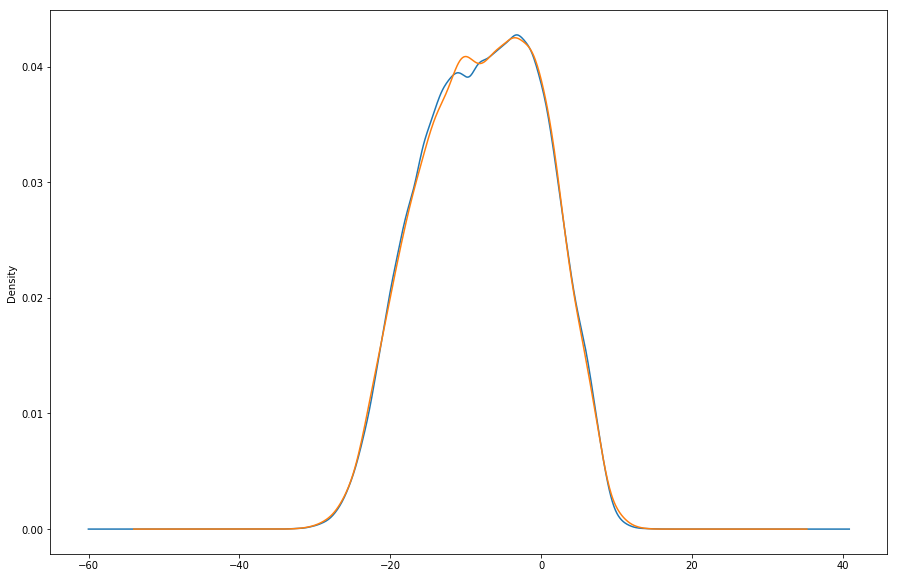

In [320]:
colors = plt.cm.datad["tab20"]['listed']
vars_='var_30'
scaleddf_train=train_df
scaleddf_train[train_label==0][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[0])
scaleddf_train[train_label==1][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[2])
#train_df[vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[4])

In [617]:
train_fake=['var_0', 'var_5', 'var_10', 'var_11', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_24', 'var_30', 'var_35', 'var_36', 'var_38', 'var_39',
       'var_40', 'var_41', 'var_44', 'var_45', 'var_46', 'var_47',
       'var_48', 'var_49', 'var_51', 'var_52', 'var_54', 'var_55',
       'var_58', 'var_60', 'var_61', 'var_65', 'var_67', 'var_70',
       'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_80',
       'var_82', 'var_83', 'var_84', 'var_86', 'var_87', 'var_89',
       'var_90', 'var_92', 'var_96', 'var_97', 'var_100', 'var_101',
       'var_102', 'var_106', 'var_107', 'var_110', 'var_113', 'var_117',
       'var_118', 'var_119', 'var_120', 'var_122', 'var_123', 'var_124',
       'var_135', 'var_136', 'var_137', 'var_138', 'var_139', 'var_140',
       'var_141', 'var_142', 'var_145', 'var_146', 'var_147', 'var_149',
       'var_151', 'var_152', 'var_154', 'var_155', 'var_158', 'var_159',
       'var_160', 'var_163', 'var_167', 'var_168', 'var_170', 'var_171',
       'var_172', 'var_173', 'var_174', 'var_176', 'var_178', 'var_182',
       'var_183', 'var_184', 'var_186', 'var_187', 'var_190', 'var_191',
       'var_193', 'var_196', 'var_199']
tmp=train_df.loc[:,:].reset_index(drop=True)
unq=[]
for f in tqdm(train_fake):
    unq.append(train_df[f].values)
flat_unq = [item for sublist in unq for item in sublist]
cnt=pd.Series(flat_unq).value_counts()
for f in tqdm(train_fake):
        tmp[f+'counts']=tmp[f].map(cnt)

100%|██████████| 106/106 [00:02<00:00, 50.19it/s]


In [80]:
var_to_random='var_41'
#tmp=train_df.loc[:,:].reset_index(drop=True)
tmp['tmp']=pd.Series(np.random.normal(train_df[var_to_random].mean(),train_df[var_to_random].std(),train_df.shape[0]).round(4))
tmp['tmp_c']=tmp['tmp'].map(tmp['tmp'].value_counts())
#tmp['tmp_cut']=pd.cut(tmp['tmp'],500,labels=False)
#tmp['tmp_cut']=tmp['tmp_cut'].map(tmp['tmp_cut'].value_counts())

#tmp['tmp_cut_vrai']=pd.cut(tmp[var_to_random],500,labels=False)
#tmp['tmp_cut_vrai']=tmp['tmp_cut_vrai'].map(tmp['tmp_cut_vrai'].value_counts())

TypeError: list indices must be integers or slices, not str

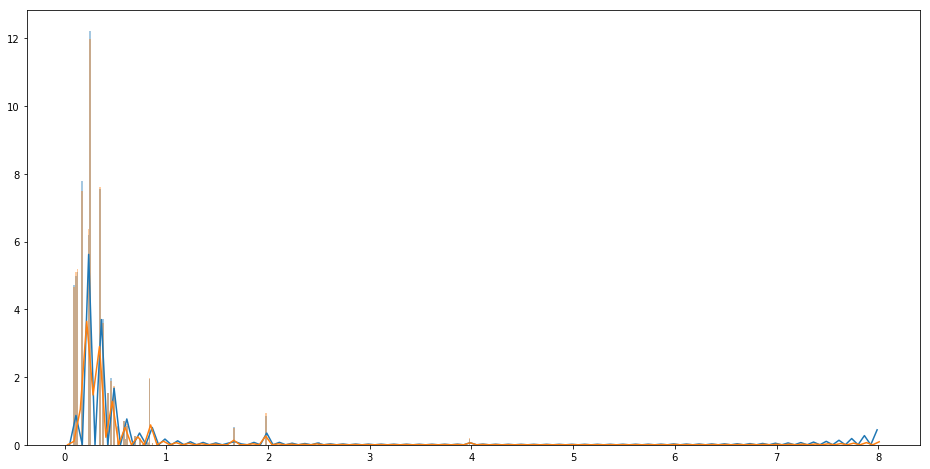

In [15]:
colors = plt.cm.datad["tab20"]['listed']
vars_=['var_41_FE1_5']
plt.figure(figsize=(16,8))
sns.distplot(train_df[train_label==0][vars_].reset_index(drop=True),bins=500)
sns.distplot(train_df[train_label==1][vars_].reset_index(drop=True),bins=500)
#sns.distplot(train_df[vars_].reset_index(drop=True),bins=250)


In [27]:
colors = plt.cm.datad["tab20"]['listed']
vars_=var_to_random+'_FE1'
#vars_='var_41counts'
#tmp['tmp']=pd.cut(tmp['var_7'],200,labels=False)
#tmp['tmp']=tmp['tmp'].map(tmp['tmp'])
plt.figure(figsize=(16,8))
sns.distplot(tmp[train_label==0][vars_].reset_index(drop=True),bins=250)
sns.distplot(tmp[train_label==1][vars_].reset_index(drop=True),bins=250)
#sns.distplot(tmp[vars_].reset_index(drop=True),bins=250)

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


KeyError: 'var_41_FE1'

<Figure size 1152x576 with 0 Axes>

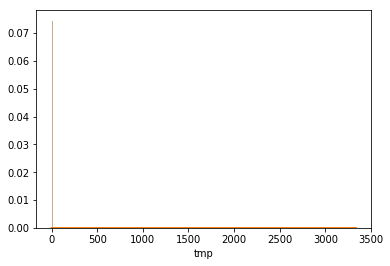

In [74]:
colors = plt.cm.datad["tab20"]['listed']
vars_='tmp'
tmp=train_df.loc[:,:].reset_index(drop=True)
#tmp['tmp']=pd.cut(tmp['var_7'],200,labels=False)
#tmp['tmp']=tmp['tmp'].map(tmp['tmp'])
#plt.figure(figsize=(16,8))
sns.distplot(tmp[train_label==0][vars_].reset_index(drop=True),bins=250)
sns.distplot(tmp[train_label==1][vars_].reset_index(drop=True),bins=250)
#sns.distplot(tmp[vars_].reset_index(drop=True),bins=250)
#train_df[train_label==0][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[0])
#train_df[train_label==1][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[2])
#train_df[vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[4])train_df['var_2']

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


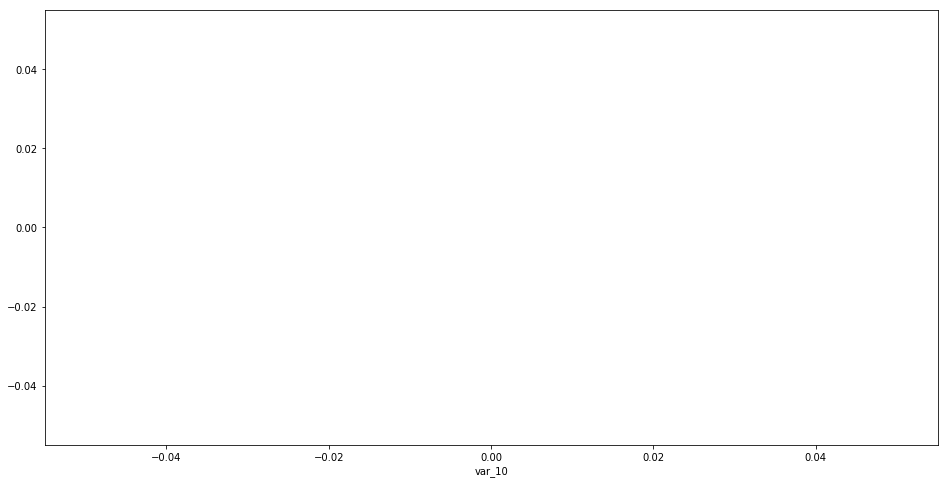

In [14]:
#train_df['target']=train_label.copy()
tmp=train_df.loc[(train_df['var_10']<-1)&(train_df['var_10']>=-2),['var_10','target']]
res=tmp['var_10'].value_counts()
res=tmp['var_10'].map(res)
plt.figure(figsize=(16,8))
sns.distplot(res[tmp.target==0].reset_index(drop=True),bins=250)
sns.distplot(res[tmp.target==1].reset_index(drop=True),bins=250)
#res

In [47]:
train_df['81_tmp']=train_df['var_81'].map(train_df['var_81'].value_counts())
train_df['30_tmp']=train_df['var_30'].map(train_df['var_30'].value_counts())

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
#train_df['target']=train_label
res=train_df.loc[(train_df['var_30']<15.65)&(train_df['var_30']>5.56),['var_30','var_30_FE1','target']].sort_values('var_30')
print(res.to_string())

         var_30  var_30_FE1  target
53350    5.5602     0.37279       0
187578   5.5604     0.37279       0
152997   5.5605     0.37279       0
6605     5.5606     0.37279       0
12597    5.5609     0.37279       0
161905   5.5616     2.70929       0
31436    5.5616     2.70929       0
85820    5.5617     1.35465       0
13130    5.5618     1.35465       0
86781    5.5626     2.70929       1
174779   5.5626     2.70929       0
159007   5.5638     2.70929       0
2208     5.5638     2.70929       0
41502    5.5642     1.35465       0
86499    5.5648     1.35465       0
142748   5.5651     1.35465       0
177619   5.5655     2.70929       0
99540    5.5655     2.70929       0
187534   5.5656     1.35465       0
122947   5.5662     1.35465       0
197472   5.5665     1.35465       0
52400    5.5669     1.35465       0
173429   5.5674     1.35465       0
76147    5.5676     1.35465       0
117120   5.5680     1.35465       1
122819   5.5682     1.35465       0
95625    5.5684     1.35465 

In [13]:
f='var_40'
dic=dict()
j=5
_,bins=pd.cut(train_df[f],bins=j,retbins=True)
tmp=train_df[f]
for i in range(j):
    res=tmp[(tmp>bins[i])&(tmp<=bins[i+1])]
    res=np.round((10000*res.value_counts()/res.size),5)
    dic = {**dic, **res.to_dict()}
train_df[f+'_FE1']=tmp.map(dic)

In [117]:
bins

array([-39.24342,  25.1409 ])

In [82]:
np.argwhere(np.array(tmp)<100)[:,0]

array([  7,  17, 129, 152, 176])

## Sorting

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(train_df, train_label, test_size=0.1, random_state=131)

In [404]:
train_df[var_to_random].std()

0.17109118336970938

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def FE_(train):
    scaleddf=train.copy()
    scaleddf['mean_1']=scaleddf.mean(axis=1)
    scaleddf['std_1']=scaleddf.iloc[:,-25:].std(axis=1)
    scaleddf['max_1']=scaleddf.iloc[:,-25:].max(axis=1)
    scaleddf['min_1']=scaleddf.iloc[:,-25:].min(axis=1)
    scaleddf['0.25_1']=scaleddf.iloc[:,-25:].quantile(0.25,axis=1)
    scaleddf['0.5_1']=scaleddf.iloc[:,-25:].quantile(0.5,axis=1)
    scaleddf['0.75_1']=scaleddf.iloc[:,-25:].quantile(0.75,axis=1)


    scaleddf['mean_0']=scaleddf.iloc[:,:25].mean(axis=1)
    scaleddf['std_0']=scaleddf.iloc[:,:25].std(axis=1)
    scaleddf['max_0']=scaleddf.iloc[:,:25].max(axis=1)
    scaleddf['min_0']=scaleddf.iloc[:,:25].min(axis=1)
    scaleddf['0.25_0']=scaleddf.iloc[:,:25].quantile(0.25,axis=1)
    scaleddf['0.5_0']=scaleddf.iloc[:,:25].quantile(0.5,axis=1)
    scaleddf['0.75_0']=scaleddf.iloc[:,:25].quantile(0.75,axis=1)
    return scaleddf

def Scale_FE(tr):
    train=tr.copy()
    #ss = StandardScaler()
    #train = ss.fit_transform(train)
    #train = pd.DataFrame(train)
    train=train.apply(lambda x : np.abs(x-x.mean())/x.std(),axis=0)
    #train=sigmoid(train)
    train=train.apply(lambda x : x.sort_values().reset_index(drop=True),axis=1)
    #train=FE_(train)

    return train


tmp=Scale_FE(train_df)
#X_train=pd.concat([X_train.reset_index(drop=True),tmp.iloc[:,0:25],tmp.iloc[:,-25-14:-14],tmp.iloc[:,-14:]],axis=1).reset_index(drop=True)
#tmp=Scale_FE(X_test)
#X_test=pd.concat([X_test.reset_index(drop=True),tmp.iloc[:,0:25],tmp.iloc[:,-25-14:-14],tmp.iloc[:,-14:]],axis=1).reset_index(drop=True)


In [164]:
tmp

array(['var_47', 'var_61', 'var_134', 'var_82', 'var_180', 'var_40',
       'var_10', 'var_135', 'var_69', 'var_45', 'var_1', 'var_164',
       'var_187', 'var_84', 'var_90', 'var_27', 'var_196', 'var_128',
       'var_8', 'var_32', 'var_199', 'var_147', 'var_5', 'var_71',
       'var_103', 'var_189', 'var_176', 'var_30', 'var_37', 'var_22',
       'var_78', 'var_51', 'var_178', 'var_127', 'var_14', 'var_161',
       'var_140', 'var_170', 'var_53', 'var_162', 'var_119', 'var_112',
       'var_184', 'var_91', 'var_41', 'var_144', 'var_3', 'var_38',
       'var_111', 'var_55', 'var_107', 'var_9', 'var_182', 'var_186',
       'var_24', 'var_60', 'var_18', 'var_19', 'var_4', 'var_175',
       'var_130', 'var_54', 'var_125', 'var_151', 'var_145', 'var_49',
       'var_156', 'var_15', 'var_20', 'var_137', 'var_79', 'var_160',
       'var_94', 'var_96', 'var_85', 'var_77', 'var_97', 'var_70',
       'var_136', 'var_120'], dtype=object)

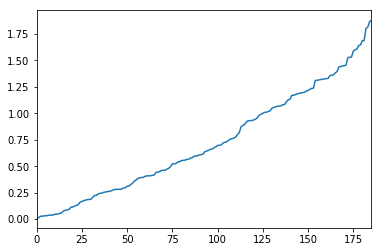

In [19]:
import numpy as np

def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

tmp.iloc[train_label[train_label==1].index[100],:-14].plot()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss = StandardScaler(with_mean=True,with_std=True)
#ss=MinMaxScaler()
scaled = ss.fit_transform(train_df)
scaleddf_train = pd.DataFrame(scaled)


#ss = StandardScaler()
#ss=MinMaxScaler()
#scaled = ss.fit_transform(test_df)
#scaleddf_test = pd.DataFrame(scaled)

#scaleddf_T = scaleddf.T


In [49]:
tmp[199]

0          573
1         1060
2         1006
3         1060
4          346
5          571
6          993
7          751
8         1054
9          840
10         986
11         836
12         772
13         733
14        1063
15         338
16         885
17         907
18         336
19         612
20         759
21         556
22         420
23          41
24        1080
25         612
26        1071
27         171
28         846
29        1069
          ... 
199970     943
199971    1022
199972     199
199973     154
199974     787
199975    1022
199976     742
199977     967
199978    1038
199979     217
199980     188
199981     983
199982     917
199983     943
199984     983
199985     968
199986     999
199987    1011
199988     943
199989    1038
199990     960
199991     787
199992    1077
199993     709
199994     983
199995     983
199996      39
199997     285
199998     617
199999    1080
Name: 199, Length: 200000, dtype: int64

In [36]:
target=train_label.copy()
negative_index=target[target==0].index.values
np.random.seed(16362)
np.random.shuffle(negative_index)

positive_index=target[target==1].index.values
np.random.shuffle(positive_index)

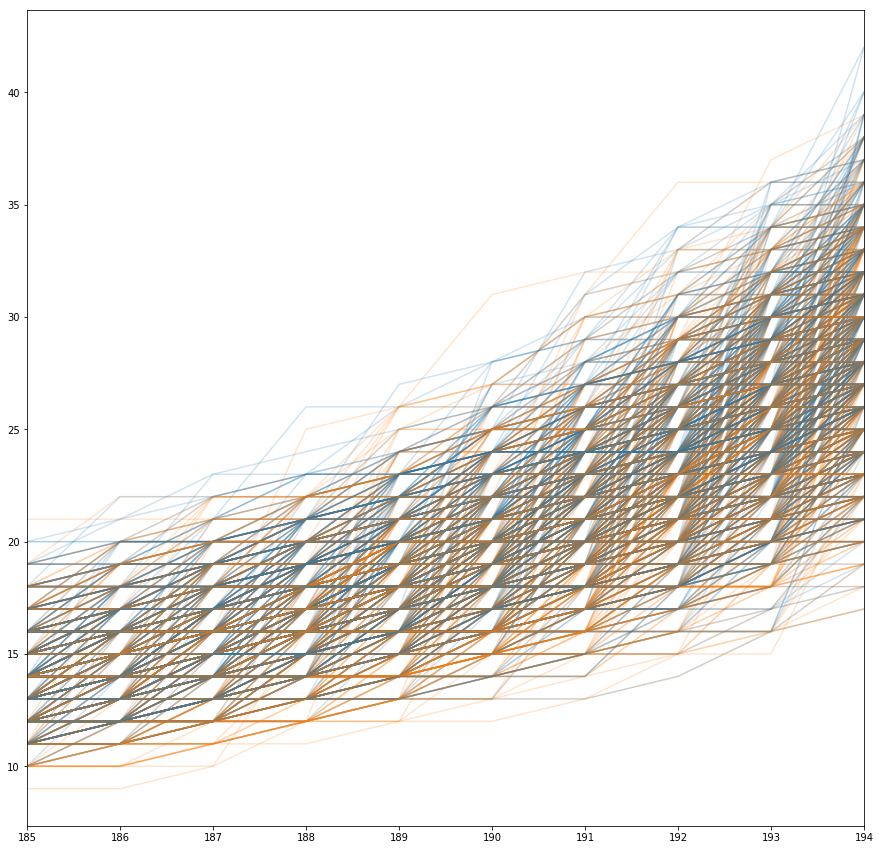

In [61]:
from tqdm import tqdm

def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

colors = plt.cm.datad["tab20"]['listed']
scaleddf_train=tmp.iloc[:,185:195]
for plotcount in range(7000, 8000):
    scaleddf_train.iloc[negative_index[plotcount+332],:].plot(figsize=(15, 15), color=colors[0], alpha=0.2)
    scaleddf_train.iloc[positive_index[plotcount-33],:].plot(figsize=(15, 15), color=colors[2], alpha=0.2)

In [76]:
test_df.iloc[real_samples_indexes,:]['var_81']

3         15.4375
7         18.7879
11        13.6884
15        16.7914
16        12.5129
17        13.0824
18        13.1566
20        17.8319
21        11.0789
22        16.3863
24        16.0228
29        13.4811
34        12.1828
37        15.3750
39        21.0006
42        20.3832
43        19.3819
44        14.9753
45        14.8325
46        14.7342
48        12.6863
50        17.4597
53        20.1471
54        10.6454
55        13.8209
56        11.2573
57        18.3149
63        13.0062
66        13.8264
67        13.7421
           ...   
199949    11.6757
199950    14.6213
199951    12.5958
199953    15.4828
199955    15.5614
199956    15.4297
199957    15.4871
199960    16.2212
199961    11.3539
199963    12.3639
199964    17.5225
199965    15.6266
199967    12.7171
199968    17.1799
199969    17.0022
199970    17.2655
199972    16.4620
199973    12.9890
199974    14.7538
199976    16.7383
199980    12.8908
199982    19.4998
199983    14.1630
199984    14.9644
199985    

In [87]:
##### from tqdm import tqdm
tmp_df=test_df.iloc[synthetic_samples_indexes,:].copy()
lst=[]
cols=tmp_df.shape[1]

for i in tqdm(range(1,2)):
    tmpf=tmp_df.iloc[:,i].unique()
    for g in range(0,cols):
        if i==g:
            continue
        tmpg=tmp_df.iloc[:,g].unique()
        #res=[k for k in tmpf if k not in tmpg]
        # print(res)
        res=np.intersect1d(tmpf,tmpg)
        if len(res)==0:
            print("hola")
            lst.append(g)
            break
lst
#lst=[f for f in range(200) if f not in lst]
#tmp_df.columns[lst].values

100%|██████████| 1/1 [00:00<00:00,  6.93it/s]

hola


[12]

In [13]:
syntitic_fake=['var_0', 'var_5', 'var_10', 'var_11', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_24', 'var_30', 'var_35', 'var_38', 'var_39', 'var_40',
       'var_41', 'var_44', 'var_45', 'var_47', 'var_48', 'var_49',
       'var_51', 'var_52', 'var_54', 'var_55', 'var_58', 'var_60',
       'var_61', 'var_65', 'var_67', 'var_70', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_80', 'var_82', 'var_83',
       'var_84', 'var_86', 'var_87', 'var_89', 'var_90', 'var_92',
       'var_96', 'var_97', 'var_100', 'var_101', 'var_102', 'var_107',
       'var_110', 'var_113', 'var_117', 'var_118', 'var_119', 'var_120',
       'var_122', 'var_123', 'var_124', 'var_135', 'var_136', 'var_137',
       'var_138', 'var_139', 'var_140', 'var_141', 'var_142', 'var_145',
       'var_147', 'var_149', 'var_151', 'var_152', 'var_154', 'var_155',
       'var_158', 'var_159', 'var_160', 'var_163', 'var_167', 'var_168',
       'var_170', 'var_171', 'var_172', 'var_173', 'var_174', 'var_176',
       'var_178', 'var_179', 'var_182', 'var_183', 'var_184', 'var_186',
       'var_187', 'var_190', 'var_191', 'var_193', 'var_196', 'var_199']

test_fake=['var_0', 'var_5', 'var_10', 'var_11', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_24', 'var_30', 'var_35', 'var_38', 'var_39', 'var_40',
       'var_41', 'var_44', 'var_45', 'var_47', 'var_48', 'var_49',
       'var_51', 'var_52', 'var_54', 'var_55', 'var_58', 'var_60',
       'var_61', 'var_65', 'var_67', 'var_70', 'var_72', 'var_73',
       'var_74', 'var_75', 'var_76', 'var_80', 'var_82', 'var_83',
       'var_84', 'var_86', 'var_87', 'var_89', 'var_90', 'var_92',
       'var_96', 'var_97', 'var_100', 'var_101', 'var_102', 'var_106',
       'var_107', 'var_110', 'var_113', 'var_117', 'var_118', 'var_119',
       'var_120', 'var_122', 'var_123', 'var_124', 'var_135', 'var_136',
       'var_137', 'var_138', 'var_139', 'var_140', 'var_141', 'var_142',
       'var_145', 'var_146', 'var_147', 'var_149', 'var_151', 'var_152',
       'var_154', 'var_155', 'var_158', 'var_159', 'var_160', 'var_163',
       'var_167', 'var_168', 'var_170', 'var_171', 'var_172', 'var_173',
       'var_174', 'var_176', 'var_178', 'var_179', 'var_182', 'var_183',
       'var_184', 'var_186', 'var_187', 'var_190', 'var_191', 'var_193',
       'var_196', 'var_199']

train_fake=['var_0', 'var_5', 'var_10', 'var_11', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22',
       'var_24', 'var_30', 'var_35', 'var_36', 'var_38', 'var_39',
       'var_40', 'var_41', 'var_44', 'var_45', 'var_46', 'var_47',
       'var_48', 'var_49', 'var_51', 'var_52', 'var_54', 'var_55',
       'var_58', 'var_60', 'var_61', 'var_65', 'var_67', 'var_70',
       'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_80',
       'var_82', 'var_83', 'var_84', 'var_86', 'var_87', 'var_89',
       'var_90', 'var_92', 'var_96', 'var_97', 'var_100', 'var_101',
       'var_102', 'var_106', 'var_107', 'var_110', 'var_113', 'var_117',
       'var_118', 'var_119', 'var_120', 'var_122', 'var_123', 'var_124',
       'var_135', 'var_136', 'var_137', 'var_138', 'var_139', 'var_140',
       'var_141', 'var_142', 'var_145', 'var_146', 'var_147', 'var_149',
       'var_151', 'var_152', 'var_154', 'var_155', 'var_158', 'var_159',
       'var_160', 'var_163', 'var_167', 'var_168', 'var_170', 'var_171',
       'var_172', 'var_173', 'var_174', 'var_176', 'var_178', 'var_182',
       'var_183', 'var_184', 'var_186', 'var_187', 'var_190', 'var_191',
       'var_193', 'var_196', 'var_199']

[f for f in train_fake if f not in syntitic_fake]

['var_36', 'var_46', 'var_106', 'var_146']

In [47]:

tmp=train_df[train_fake]
#tmp['var_0'].unique().shape
np.intersect1d(train_df['var_12'].unique(),train_df['var_41'].unique()).shape

(6142,)

In [79]:
tmp_df=test_df.iloc[real_samples_indexes,:].copy()

val=14.8325
#synthetic_samples_indexes
res=[]
for f in tmp_df.columns:
    tmp=tmp_df.loc[tmp_df[f]==val,f]
    if not tmp.empty:
        res.append(f)
print(res)

['var_13', 'var_15', 'var_18', 'var_21', 'var_33', 'var_49', 'var_56', 'var_60', 'var_67', 'var_74', 'var_77', 'var_79', 'var_81', 'var_83', 'var_87', 'var_92', 'var_97', 'var_101', 'var_104', 'var_107', 'var_113', 'var_129', 'var_137', 'var_142', 'var_143', 'var_146', 'var_149', 'var_150', 'var_153', 'var_158', 'var_160', 'var_163', 'var_172', 'var_174', 'var_177', 'var_182', 'var_188', 'var_191', 'var_198']


In [78]:
tmp_df=test_df.iloc[synthetic_samples_indexes,:].copy()

#synthetic_samples_indexes
res=[]
for f in tmp_df.columns:
    tmp=tmp_df.loc[tmp_df[f]==val,f]
    if not tmp.empty:
        res.append(f)
print(res)

['var_13', 'var_15', 'var_33', 'var_56', 'var_67', 'var_79', 'var_81', 'var_83', 'var_92', 'var_97', 'var_101', 'var_104', 'var_107', 'var_113', 'var_129', 'var_142', 'var_146', 'var_149', 'var_150', 'var_153', 'var_160', 'var_163', 'var_172', 'var_177', 'var_182', 'var_198']


/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/pandas/plotting/_core.py:1447: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/pandas/plotting/_core.py:1448: RuntimeWarning: All-NaN slice encountered
  ind = np.linspace(np.nanmin(y) - 0.5 * sample_range,
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/pandas/plotting/_core.py:1449: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range, 1000)


ValueError: `dataset` input should have multiple elements.

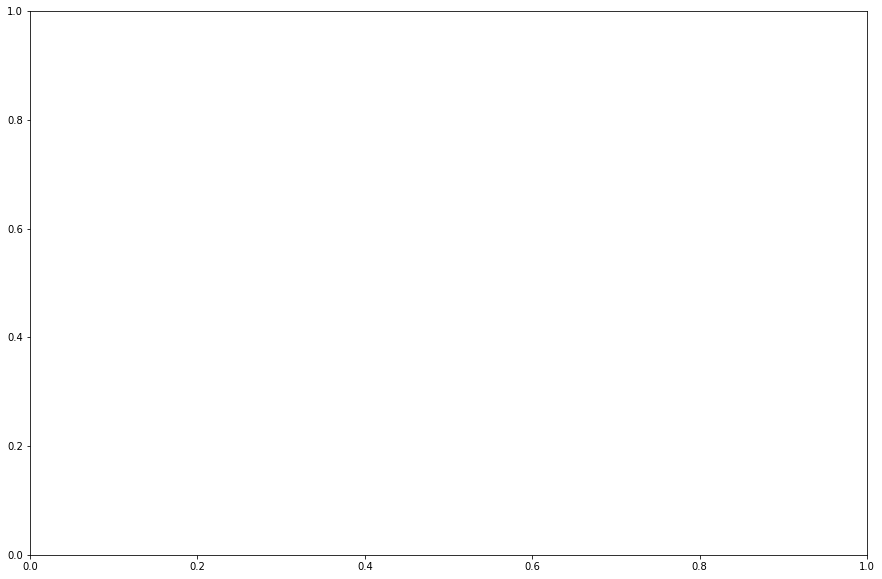

In [39]:
unq=[]
for f in tqdm(columns):
    unq.append(tmp_df[f].unique())
flat_unq = [item for sublist in unq for item in sublist]
cnt=pd.Series(flat_unq).value_counts()
for f in tqdm(columns):
        df[f+suf]=df[f].map(cnt)
            

##### colors = plt.cm.datad["tab20"]['listed']
vars_=0
scaleddf_train=pd.DataFrame(tmp.iloc[:,150:].quantile(0.1,axis=1))
scaleddf_train[train_label==0].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[0])
scaleddf_train[train_label==1].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[2])
scaleddf_train.reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[4])

## shuffling

In [9]:
def disarrange(a, axis=-1):
    """
    Shuffle `a` in-place along the given axis.

    Apply numpy.random.shuffle to the given axis of `a`.
    Each one-dimensional slice is shuffled independently.
    """
    b = a.swapaxes(axis, -1)
    # Shuffle `b` in-place along the last axis.  `b` is a view of `a`,
    # so `a` is shuffled in place, too.
    shp = b.shape[:-1]
    for ndx in np.ndindex(shp):
        np.random.shuffle(b[ndx])
    return


def augment_fast2(x,y,axis=0,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y==1
        x1 = x[mask].copy()
        disarrange(x1,axis)
        #disarrange(x1,1-axis)
        xs.append(x1)

    for i in range(t):
        mask = y==0
        x1 = x[mask].copy()
        disarrange(x1,axis)
        #disarrange(x1,1-axis)
        #if shuffle:
        #    x1=x1[:, np.random.permutation(x1.shape[1])]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

In [13]:
x1,y1 = augment_fast2(train_df.values,train_label.values,axis=1,t=1)
train_df = pd.DataFrame(x1)
train_df = train_df.add_prefix('var_')
print(train_df.shape)


(200000, 200)


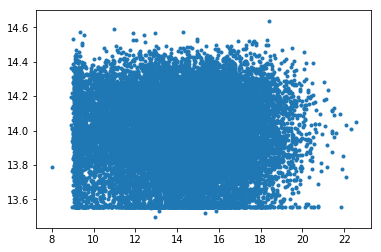

In [44]:
import matplotlib.pyplot as plt
#train_df.plot.scatter('var_81','var_76')

plt.scatter(x=train_df.loc[train_label==1,'var_81'],y=train_df.loc[train_label==1,'var_12'],marker='.')
plt.show()

In [296]:
unq=train_df['new'].unique()
unq2=train_df.loc[train_label==1,'new'].value_counts()
tmp=[f for f in train_df['new'].unique() if f not in train_df.loc[train_label==1,'new'].unique()]
print(len(unq))
print(len(unq2))
len(tmp)

236
212


24

In [67]:
tmp=train_df['var_17'].sort_values()
dic=dict(zip(tmp,np.concatenate([np.diff(tmp).round(4),[0]])))
train_df['tmp']=train_df['var_17'].map(dic)
train_df['tmp'].max()

3.3006

In [22]:
f='var_40'
dic=dict()
j=5
_,bins=pd.cut(train_df[f],bins=j,retbins=True)
tmp=train_df[f]
for i in range(j):
    res=tmp[(tmp>bins[i])&(tmp<=bins[i+1])]
    res=np.round((10000*res.value_counts()/res.size),5)
    dic = {**dic, **res.to_dict()}
train_df[f+'_FE1']=tmp.map(dic)

array([], dtype=float64)

In [58]:
tt=pd.Series(np.random.normal(train_df['var_41'].mean(),train_df['var_41'].std(),train_df.shape[0]).round(4))
frac,_=np.modf(tt*100)
int_=np.abs(frac)*10
train_df['tmp_nor']=int_
train_df['tmp_nor']

0         8.8
1         4.7
2         5.7
3         8.6
4         9.7
5         7.7
6         8.9
7         3.6
8         0.5
9         5.3
10        5.9
11        0.6
12        7.1
13        2.0
14        2.5
15        7.9
16        8.7
17        0.1
18        2.1
19        8.7
20        2.3
21        7.8
22        5.4
23        1.0
24        1.6
25        2.4
26        0.7
27        6.4
28        4.1
29        2.5
         ... 
199970    2.2
199971    7.4
199972    0.8
199973    8.7
199974    6.2
199975    4.4
199976    1.9
199977    2.0
199978    3.3
199979    5.4
199980    9.8
199981    0.7
199982    5.1
199983    4.8
199984    1.5
199985    0.4
199986    4.9
199987    2.6
199988    9.6
199989    6.5
199990    0.6
199991    7.1
199992    7.8
199993    8.3
199994    6.3
199995    5.7
199996    3.6
199997    6.5
199998    3.6
199999    6.2
Name: tmp_nor, Length: 200000, dtype: float64

In [57]:
frac,int_=np.modf(train_df['var_41']*100)
train_df['tmp']=np.abs(frac)*10
train_df['tmp']

0         74.0
1         73.0
2         43.0
3         36.0
4         68.0
5         73.0
6         38.0
7         99.0
8         70.0
9         46.0
10        76.0
11        50.0
12        25.0
13        22.0
14        26.0
15        27.0
16        98.0
17         4.0
18        45.0
19        68.0
20        93.0
21        70.0
22        71.0
23        47.0
24        86.0
25        30.0
26        64.0
27         2.0
28        66.0
29         3.0
          ... 
199970    90.0
199971    19.0
199972     4.0
199973    51.0
199974    77.0
199975    48.0
199976    57.0
199977     8.0
199978    44.0
199979    10.0
199980    19.0
199981     4.0
199982    34.0
199983    42.0
199984    84.0
199985    52.0
199986    39.0
199987    27.0
199988    75.0
199989    20.0
199990    37.0
199991    81.0
199992    84.0
199993    17.0
199994    74.0
199995    74.0
199996    31.0
199997    22.0
199998    62.0
199999    22.0
Name: tmp, Length: 200000, dtype: float64

In [53]:
train_df['target']=train_label
f='var_40'
res=train_df.loc[(train_df[f]>10)&(train_df[f]<12),[f,f+'_FE1','target']].sort_values(f)
print(res.to_string())

         var_40  var_40_FE1  target
52201   10.0006         NaN       0
70149   10.0006         NaN       0
113496  10.0028         NaN       0
401     10.0028         NaN       0
10629   10.0034         NaN       0
113812  10.0036         NaN       1
31808   10.0047         NaN       0
65706   10.0049         NaN       1
49174   10.0050         NaN       0
155632  10.0050         NaN       0
73511   10.0055         NaN       1
91792   10.0056         NaN       0
74497   10.0064         NaN       0
11078   10.0065         NaN       0
45156   10.0072         NaN       0
19860   10.0073         NaN       0
83439   10.0074         NaN       0
101213  10.0080         NaN       1
152142  10.0088         NaN       0
57890   10.0095         NaN       0
93822   10.0120         NaN       0
83452   10.0121         NaN       0
61538   10.0127         NaN       0
46324   10.0127         NaN       1
104276  10.0172         NaN       0
64288   10.0174         NaN       0
112619  10.0185         NaN 

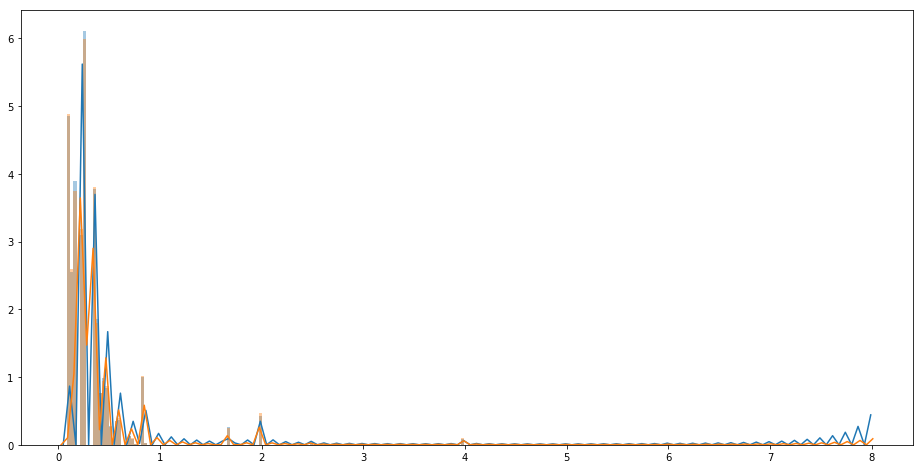

In [21]:
colors = plt.cm.datad["tab20"]['listed']
vars_=['var_41_FE1_4']
#pd.cut(train_df[f],250,labels=False)
tmp=train_df.loc[:,:].reset_index(drop=True)
plt.figure(figsize=(16,8))
sns.distplot(tmp[train_label==0][vars_].reset_index(drop=True),bins=250)
sns.distplot(tmp[train_label==1][vars_].reset_index(drop=True),bins=250)
#sns.distplot(tmp[vars_].reset_index(drop=True),bins=300)
#train_df[train_label==0][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[0])
#train_df[train_label==1][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[2])
#train_df[vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[4])

## Rest

In [14]:
train_df.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_196_FE1frac1000', 'var_197_FE1_5', 'var_197_FE1frac100',
       'var_197_FE1frac1000', 'var_198_FE1_5', 'var_198_FE1frac100',
       'var_198_FE1frac1000', 'var_199_FE1_5', 'var_199_FE1frac100',
       'var_199_FE1frac1000'],
      dtype='object', length=800)

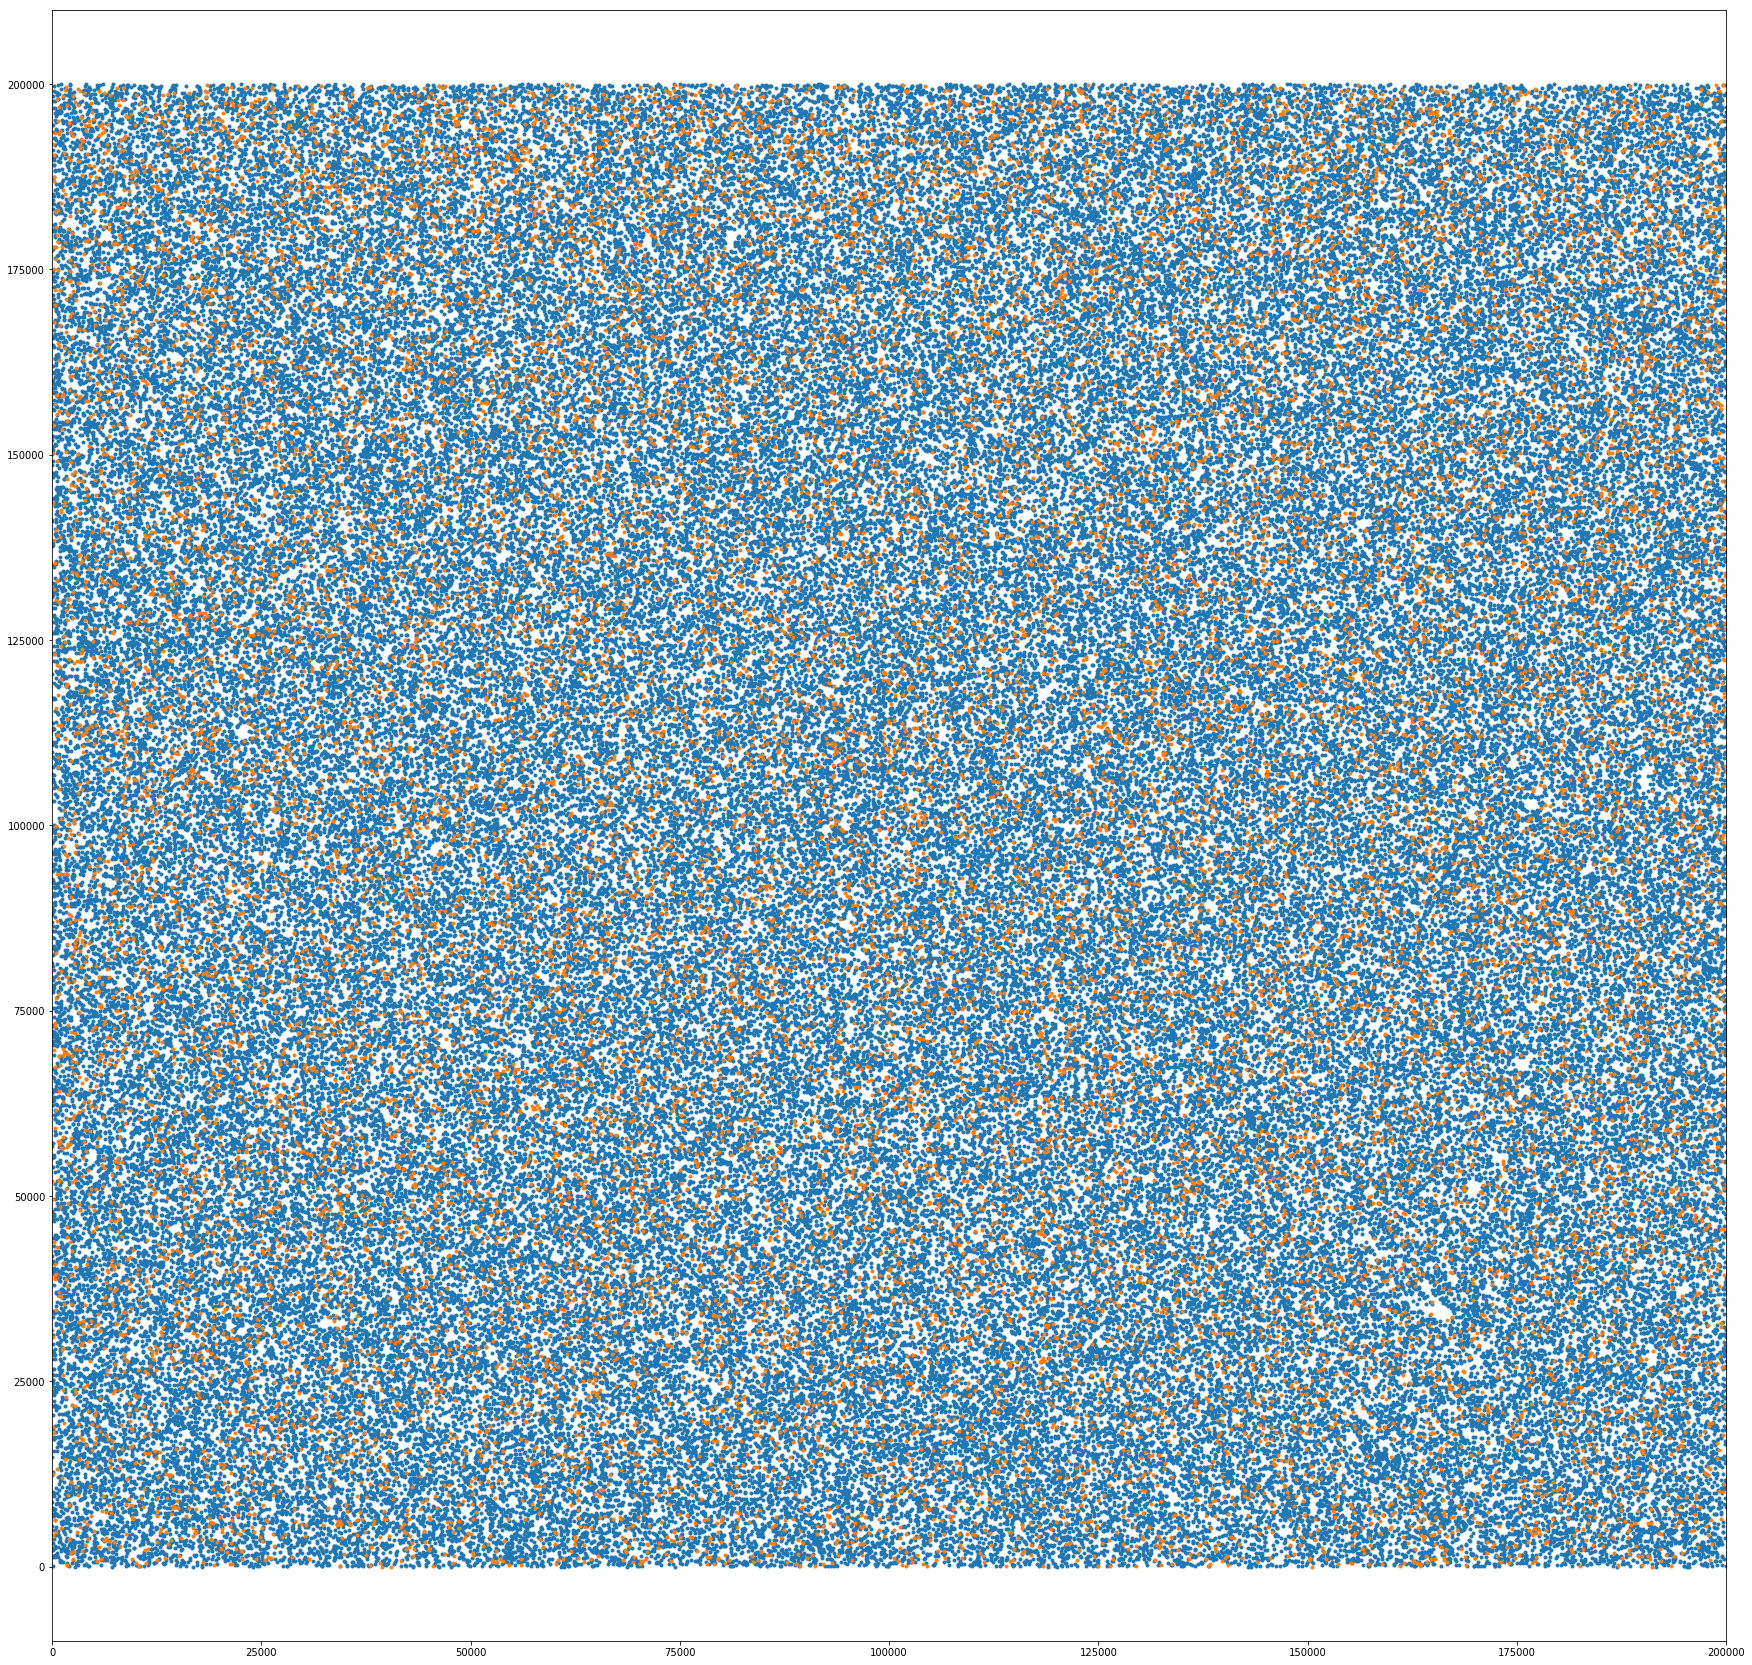

In [23]:
var='var_199'
train_df[var+'_rank']=train_df[var].rank()
train_df.loc[train_label==0][var+'_rank'].plot(figsize=(30,30),style='.')
train_df.loc[train_label==1][var+'_rank'].plot(figsize=(30,30),style='.')

In [35]:
train=train_df.apply(lambda x : (x-x.mean())/x.std(),axis=0)

In [4]:
train_df['var_18'].mean()

15.244013001999955

In [27]:
train.iloc[target[target==0].index[100],].sort_values().index.values

array(['var_155', 'var_114', 'var_80', 'var_82', 'var_93', 'var_34',
       'var_161', 'var_94', 'var_43', 'var_45', 'var_74', 'var_19',
       'var_170', 'var_53', 'var_190', 'var_49', 'var_198', 'var_37',
       'var_157', 'var_79', 'var_189', 'var_172', 'var_12', 'var_17',
       'var_178', 'var_89', 'var_115', 'var_145', 'var_132', 'var_130',
       'var_96', 'var_31', 'var_183', 'var_106', 'var_61', 'var_20',
       'var_152', 'var_140', 'var_103', 'var_185', 'var_174', 'var_171',
       'var_7', 'var_97', 'var_30', 'var_64', 'var_75', 'var_193',
       'var_32', 'var_176', 'var_66', 'var_186', 'var_71', 'var_123',
       'var_135', 'var_182', 'var_15', 'var_146', 'var_92', 'var_139',
       'var_76', 'var_51', 'var_134', 'var_154', 'var_194', 'var_156',
       'var_105', 'var_165', 'var_122', 'var_191', 'var_147', 'var_27',
       'var_90', 'var_121', 'var_13', 'var_0', 'var_22', 'var_72',
       'var_173', 'var_142', 'var_14', 'var_67', 'var_179', 'var_153',
       'var_113', 'v

In [26]:
train=train_df.apply(lambda x : np.abs(x-x.mean())/x.std(),axis=0)

In [27]:
res=[]
res2=[]
res3=[]
from tqdm import tqdm
data=train.loc[target==1,:]
for i in tqdm(range(data.shape[0])):
    tmp=data.iloc[i,:].sort_values().index.values
    res.append(tmp[160:175])
    res2.append(tmp[150:160])
    res3.append(tmp[175:190])
    
flat_list = [item for sublist in res for item in sublist]
res_=np.unique(flat_list)
res_=sorted(res_,key=lambda x: int(x[4:]))

flat_list = [item for sublist in res2 for item in sublist]
res2_=np.unique(flat_list)
res2_=sorted(res2_,key=lambda x: int(x[4:]))

100%|██████████| 20098/20098 [00:12<00:00, 1553.80it/s]


In [173]:
#flat_list = [item for sublist in res for item in sublist]
lst,count=np.unique(res,return_counts=True)
lst[np.argsort(-count)]
#print(count[np.argsort(-count)])
#lst[np.argsort(-count)][-10:]

array(['var_90', 'var_47', 'var_61', 'var_187', 'var_30', 'var_40',
       'var_45', 'var_134', 'var_5', 'var_135', 'var_69', 'var_147',
       'var_82', 'var_199', 'var_180', 'var_164', 'var_176', 'var_84',
       'var_178', 'var_1', 'var_182', 'var_54', 'var_128', 'var_10',
       'var_170', 'var_32', 'var_27', 'var_8', 'var_196', 'var_127',
       'var_140', 'var_119', 'var_97', 'var_184', 'var_145', 'var_19',
       'var_51', 'var_189', 'var_96', 'var_41', 'var_22', 'var_120',
       'var_70', 'var_18', 'var_71', 'var_137', 'var_49', 'var_136',
       'var_112', 'var_107', 'var_38', 'var_160', 'var_55', 'var_20',
       'var_186', 'var_78', 'var_37', 'var_103', 'var_151'], dtype=object)

In [30]:
#flat_list = [item for sublist in res for item in sublist]
lst,count=np.unique(res3,return_counts=True)
print(lst[np.argsort(-count)])
print(count[np.argsort(-count)])

['var_177' 'var_107' 'var_21' 'var_186' 'var_173' 'var_121' 'var_110'
 'var_92' 'var_20' 'var_87' 'var_33' 'var_167' 'var_150' 'var_118'
 'var_164' 'var_148' 'var_165' 'var_128' 'var_109' 'var_160' 'var_34'
 'var_23' 'var_57' 'var_78' 'var_146' 'var_190' 'var_139' 'var_156'
 'var_172' 'var_77' 'var_169' 'var_8' 'var_154' 'var_149' 'var_32'
 'var_178' 'var_7' 'var_52' 'var_116' 'var_127' 'var_70' 'var_51' 'var_67'
 'var_36' 'var_85' 'var_48' 'var_97' 'var_166' 'var_35' 'var_112' 'var_24'
 'var_65' 'var_147' 'var_74' 'var_10' 'var_81' 'var_132' 'var_120'
 'var_94' 'var_4' 'var_90' 'var_162' 'var_102' 'var_142' 'var_140'
 'var_136' 'var_189' 'var_54' 'var_103' 'var_137' 'var_115' 'var_1'
 'var_91' 'var_82' 'var_184' 'var_30' 'var_122' 'var_45' 'var_40' 'var_12'
 'var_58' 'var_144' 'var_47' 'var_71' 'var_199' 'var_133' 'var_174'
 'var_76' 'var_6' 'var_18' 'var_106' 'var_104' 'var_151' 'var_130'
 'var_72' 'var_171' 'var_27' 'var_14' 'var_66' 'var_22' 'var_84' 'var_28'
 'var_75' 'var_0' 'var

In [97]:
res_=np.unique(res2)
res_=sorted(res_,key=lambda x: int(x[4:]))
len(res_)

200

26        0
27        0
1785      0
2710      0
3211      1
4167      0
4631      0
4842      0
6365      0
6744      0
6924      1
7176      0
7647      0
8184      0
8579      0
9254      0
9422      0
9548      0
9721      0
10583     0
12134     0
12623     1
13871     0
14779     0
14788     0
15160     0
15443     0
16630     0
16835     0
17121     0
         ..
183651    0
183760    0
183936    1
184525    0
185175    0
186193    0
186565    0
188402    0
191716    0
191891    0
192256    0
192297    0
192571    0
193702    0
193795    0
194671    0
194677    0
194786    0
194991    0
195391    0
195587    0
195852    0
195899    0
196436    0
196500    0
197023    0
197426    0
198338    0
198671    0
199594    0
Name: target, Length: 300, dtype: int64

In [123]:
print(train_df.std().sort_values().to_string())

var_68      0.007186
var_91      0.152641
var_108     0.171091
var_103     0.185020
var_12      0.190059
var_148     0.199192
var_161     0.217938
var_71      0.266696
var_25      0.285535
target      0.300653
var_43      0.309599
var_125     0.318100
var_169     0.369437
var_166     0.369684
var_133     0.375603
var_15      0.411711
var_131     0.456280
var_23      0.526893
var_34      0.541614
var_93      0.543341
var_95      0.621125
var_50      0.691709
var_42      0.695991
var_98      0.715836
var_53      0.764753
var_126     0.776056
var_28      0.783367
var_57      0.795026
var_130     0.832199
var_59      0.854798
var_105     0.855698
var_6       0.866607
var_197     0.921625
var_144     0.922469
var_156     0.955140
var_189     0.976348
var_114     0.985396
var_111     1.082404
var_66      1.121366
var_9       1.235070
var_79      1.309055
var_181     1.371862
var_162     1.419612
var_195     1.429372
var_132     1.456486
var_192     1.478423
var_64      1.485854
var_27      1

In [121]:
train_df.loc[(train_df.var_139==train_df.var_12),['var_81','var_12','var_16','target']]

var_81   var_12   var_16  target
102989  13.428  14.1248  10.6007       0

In [92]:
tmp=train_df.iloc[:,:-1].apply(lambda x: len(x.unique()),axis=1)

In [112]:
train_label[tmp[tmp==197].index].mean()

0.3333333333333333

In [ ]:
train_df=train_df.apply(lambda x : x.,axis=1)

In [37]:
tmp.loc[tmp!=179].shape

(10692,)

In [40]:
scaleddf_train=scaleddf_train.apply(lambda x : x.sort_values().reset_index(drop=True),axis=1)
#scaleddf_test=scaleddf_test.apply(lambda x : x.sort_values().reset_index(drop=True),axis=1)

In [ ]:
train_df.loc[target==0][var+'_rank'].plot(figsize=(30,30),style='.')
train_df.loc[target==1][var+'_rank'].plot(figsize=(30,30),style='.')

In [11]:
def FE_(train):
    scaleddf=train.copy()
    scaleddf['mean_1']=scaleddf.iloc[:,170:].mean(axis=1)
    scaleddf['std_1']=scaleddf.iloc[:,170:].std(axis=1)
    scaleddf['max_1']=scaleddf.iloc[:,170:].max(axis=1)
    scaleddf['min_1']=scaleddf.iloc[:,170:].min(axis=1)
    scaleddf['0.25_1']=scaleddf.iloc[:,170:].quantile(0.25,axis=1)
    scaleddf['0.5_1']=scaleddf.iloc[:,170:].quantile(0.5,axis=1)
    scaleddf['0.75_1']=scaleddf.iloc[:,170:].quantile(0.75,axis=1)


    scaleddf['mean_0']=scaleddf.iloc[:,:30].mean(axis=1)
    scaleddf['std_0']=scaleddf.iloc[:,:30].std(axis=1)
    scaleddf['max_0']=scaleddf.iloc[:,:30].max(axis=1)
    scaleddf['min_0']=scaleddf.iloc[:,:30].min(axis=1)
    scaleddf['0.25_0']=scaleddf.iloc[:,:30].quantile(0.25,axis=1)
    scaleddf['0.5_0']=scaleddf.iloc[:,:30].quantile(0.5,axis=1)
    scaleddf['0.75_0']=scaleddf.iloc[:,:30].quantile(0.75,axis=1)
    return scaleddf

scaleddf_train=FE_(scaleddf_train)
scaleddf_test=FE_(scaleddf_test)

In [16]:
train_df=pd.concat([train_df,scaleddf_train.iloc[:,-14:]],axis=1).reset_index(drop=True)
test_df=pd.concat([test_df,scaleddf_test.iloc[:,-14:]],axis=1).reset_index(drop=True)
train_df.shape,test_df.shape


((200000, 193), (200000, 193))

In [18]:
test_df

var_0    var_1    var_2    var_3    var_4    var_5   var_6   var_8  \
0       11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805  5.8493  2.1337   
1        8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117  6.0196 -4.4131   
2        5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052  4.8950  1.5233   
3        8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744  4.9397  3.3755   
4       11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848  6.8595  2.9890   
5        5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761  4.2467  1.8790   
6        8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073  4.1670 -4.3004   
7       17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449  5.9596 -4.8068   
8        6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607  4.3386  2.5883   
9       10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018  3.4508 -1.4112   
10       8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678  5.5184  2.8032   
11      10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802  5.5515 -0.1714   
12      12.7465  -4.9467  15.5490   6.4580  13.7572 -25.5371  4.4893  3.1754   
13      11.7836   1.9979  10.3347   7.8857  13.1020   5.0167  4.9548  3.5911   
14       7.0360   1.6797   9.3865   3.2605  10.7569  -8.0802  4.7885  0.6459   
15      14.8595  -4.5378  13.6483   5.6480   9.9144   1.5190  5.0358 -2.5419   
16      14.1732  -5.1490   9.7591   3.7316  10.3700 -21.9202  7.7130  0.4680   
17       9.0936  -8.7414  17.1160   6.0126   9.2144  -3.6761  4.6477  1.7687   
18      15.7875   0.1671  10.7782   3.8521   9.1190  11.0196  6.1113 -1.0728   
19      13.3874   1.0716   8.8767   7.8374  11.6404   6.2512  4.8837  4.3871   
20       8.0259  -4.6740   8.6431   2.2198  11.4555 -14.0227  6.9192  0.4283   
21      14.3356   0.2317   9.5604   5.7603  10.3184  -6.4721  4.6898  1.8342   
22      10.4255  -6.1758  12.4846   7.9845   9.7032 -14.5969  4.4173 -0.5899   
23      12.3322  -6.3835   7.2471   5.0403  10.0875  -1.5252  5.8230 -3.8454   
24      14.1844  -9.1044   9.7453   9.2638   9.3302   2.6818  5.4711  2.2065   
25      10.0029   0.2530   7.5335   6.9343  11.6866  -6.5147  6.7327 -6.6497   
26       6.9056  -4.8626  11.8932   5.3693  11.2551 -18.9716  5.5991  5.5612   
27       8.7562  -3.0647  11.7990   9.2162  10.9847 -22.4902  4.2991  3.3233   
28       9.7243  -1.5151  11.5582   5.7360  12.1907   6.9664  4.4125 -3.9683   
29      13.2430   1.2738  10.4245   3.1863  11.4951  -1.4755  5.1005  1.7115   
...         ...      ...      ...      ...      ...      ...     ...     ...   
199970  12.7260  -1.6706  12.3598   9.1114  10.1868  -9.5857  5.3494  2.0626   
199971   9.4700  -6.7655  12.6591   9.1842  11.8260   0.0264  5.0633  2.4171   
199972  13.3243   1.0870   8.4555   3.6929  11.2423   1.3986  4.4765 -2.6573   
199973  14.2830  -1.8421  11.3664   8.5772   8.8645 -13.8986  4.1603  5.6445   
199974   4.5171  -5.2068   7.6007   8.1426  10.4433 -17.2322  4.4205 -1.0196   
199975  13.4796   2.7000  10.9653   9.1581  13.2959  -3.0995  5.1483  1.2932   
199976  12.6337  -6.9793   9.8703   9.9180  10.8092   2.5809  6.7764  4.1498   
199977  10.8078  -4.6108   9.0021   9.8910  12.4514  -3.7566  4.2958  0.8806   
199978   9.9317  -2.2815  11.1707   5.6826  12.7396  -4.0659  6.2569 -2.1645   
199979  10.5933  -1.2672  13.6817   6.3789  12.8649  -5.4964  6.4800  4.0315   
199980  13.4136   5.3912   9.6202   8.5025  12.0951  11.3431  5.8323 -3.1511   
199981   7.9218  -5.7464  11.4171   6.7972  11.6260  -8.7730  5.4601  5.1918   
199982   7.2189   1.6606  10.4651   4.4382  10.5562  -5.2083  4.7197 -8.1002   
199983  11.8527   5.4321  12.7268  10.2392  12.4740 -14.6939  6.6544 -0.4182   
199984  12.7445  -6.1135   9.9046   7.5790  14.8852   4.5083  6.3353 -4.0102   
199985  14.8983   2.1302   7.4747   7.1744  11.8252  13.1758  5.1614 -4.8184   
199986  19.2884  -2.8384  11.9149   6.6611  12.3112  12.9244  5.6492  5.3597   
199987  11.2942   3.6321  15.3300   6.6904  10.9223  -5.6537  6.0221 -0.5163   
199988   6

In [152]:
positive_index

array([187450,  64180,  25274, ...,   4460,  11202,   3956])

In [85]:
scaleddf_T[positive_index[0]].sort_values().reset_index(drop=True)

0     -2.720711
1     -2.486535
2     -2.395435
3     -2.372847
4     -2.335793
5     -2.310300
6     -2.247855
7     -2.131624
8     -2.028694
9     -1.833885
10    -1.721916
11    -1.697372
12    -1.653751
13    -1.603917
14    -1.587594
15    -1.570217
16    -1.485193
17    -1.477631
18    -1.463331
19    -1.424543
20    -1.405798
21    -1.282644
22    -1.243141
23    -1.233539
24    -1.232719
25    -1.229725
26    -1.220245
27    -1.203100
28    -1.190375
29    -1.161835
         ...   
170    1.307562
171    1.313780
172    1.318884
173    1.355366
174    1.374545
175    1.389123
176    1.394251
177    1.421846
178    1.440132
179    1.464011
180    1.466671
181    1.469504
182    1.541500
183    1.588288
184    1.592382
185    1.598243
186    1.606057
187    1.627978
188    1.648696
189    1.888972
190    1.938265
191    1.975237
192    2.000161
193    2.002586
194    2.014505
195    2.024397
196    2.089255
197    2.116598
198    2.172595
199    2.471509
Name: 187450, Length: 20

In [81]:
scaleddf_T[negative_index[0]].sort_values().reset_index(drop=True)

0     -2.095652
1     -1.996163
2     -1.818370
3     -1.769896
4     -1.762157
5     -1.675505
6     -1.656832
7     -1.644750
8     -1.643531
9     -1.601505
10    -1.575365
11    -1.571381
12    -1.558018
13    -1.526694
14    -1.493363
15    -1.488044
16    -1.484938
17    -1.466759
18    -1.436542
19    -1.404598
20    -1.396815
21    -1.387617
22    -1.382171
23    -1.374441
24    -1.355323
25    -1.322350
26    -1.294271
27    -1.234763
28    -1.191217
29    -1.191084
         ...   
170    0.858332
171    0.942910
172    0.971819
173    0.990679
174    0.999695
175    1.052524
176    1.061067
177    1.061190
178    1.092232
179    1.156705
180    1.184722
181    1.219298
182    1.221845
183    1.243621
184    1.246947
185    1.333721
186    1.435765
187    1.469869
188    1.527637
189    1.528670
190    1.543980
191    1.549680
192    1.592971
193    1.601263
194    1.643019
195    1.666618
196    1.766698
197    1.920449
198    2.376655
199    2.521887
Name: 17112, Length: 200

In [116]:
scaleddf_T[negative_index[100]].sort_values().reset_index(drop=True).plot(figsize=(15, 15), color=colors[0], alpha=0.2)
scaleddf_T[positive_index[0]].sort_values().reset_index(drop=True).plot(figsize=(15, 15), color=colors[2], alpha=0.2)

NameError: name 'scaleddf_T' is not defined

In [172]:
train_df[165]

0         1.424133
1         1.546873
2         1.108568
3         1.501744
4         1.468536
5         1.342769
6         1.351224
7         1.434466
8         1.579450
9         1.528467
10        1.362068
11        1.172095
12        1.627579
13        1.477241
14        1.694528
15        1.286344
16        1.389161
17        1.279674
18        1.430583
19        1.346724
20        1.420241
21        1.354092
22        1.521562
23        1.489153
24        1.504069
25        1.532514
26        1.602668
27        1.308383
28        1.470727
29        1.394501
            ...   
199970    1.190130
199971    1.510382
199972    1.448887
199973    1.434623
199974    1.592435
199975    1.397564
199976    1.499511
199977    1.243108
199978    1.444805
199979    1.582790
199980    1.283144
199981    1.321936
199982    1.562473
199983    1.492701
199984    1.524150
199985    1.572539
199986    1.416535
199987    1.491575
199988    1.144409
199989    1.456643
199990    1.463683
199991    1.

In [13]:
train_df

var_0   var_1    var_2    var_3    var_4    var_5   var_6    var_7  \
0        8.9255 -6.7863  11.9081   5.0930  11.4607  -9.2834  5.1187  18.6266   
1       11.5006 -4.1473  13.8588   5.3890  12.3622   7.0433  5.6208  16.5338   
2        8.6093 -2.7457  12.0805   7.8928  10.5825  -9.0837  6.9427  14.6155   
3       11.0604 -2.1518   8.9522   7.1957  12.5846  -1.8361  5.8428  14.9250   
4        9.8369 -1.4834  12.8746   6.6375  12.2772   2.4486  5.9405  19.2514   
5       11.4763 -2.3182  12.6080   8.6264  10.9621   3.5609  4.5322  15.2255   
6       11.8091 -0.0832   9.3494   4.2916  11.1355  -8.0198  6.1961  12.0771   
7       13.5580 -7.9881  13.8776   7.5985   8.6543   0.8310  5.6890  22.3262   
8       16.1071  2.4426  13.9307   5.6327   8.8014   6.1630  4.4514  10.1854   
9       12.5088  1.9743   8.8960   5.4508  13.6043 -16.2859  6.0637  16.8410   
10       5.0702 -0.5447   9.5900   4.2987  12.3910 -18.8687  6.0382  14.3797   
11      12.7188 -7.9750  10.3757   9.0101  12.8570 -12.0852  5.6464  11.8370   
12       8.7671 -4.6154   9.7242   7.4242   9.0254   1.4247  6.2815  12.3143   
13      16.3699  1.5934  16.7395   7.3330  12.1450   5.9004  4.8222  20.9729   
14      13.8080  5.0514  17.2611   8.5120  12.8517  -9.1622  5.7327  21.0517   
15       3.9416  2.6562  13.3633   6.8895  12.2806 -16.1620  5.6979  14.4573   
16       5.0615  0.2689  15.1325   3.6587  13.5276  -6.5477  5.2757   9.8710   
17       8.4199 -1.8128   8.1202   5.3955   9.7184 -17.8390  4.0959  15.2860   
18       4.8750  1.2646  11.9190   8.4650  10.7203  -0.6707  5.6103  16.4661   
19       4.4090 -0.7863  15.1828   8.0631  11.2831  -0.7356  6.3801  16.0218   
20      12.6700 -2.0221   6.8930   6.9152   9.5677 -11.2672  5.6061  16.2354   
21       8.3918  1.4806  12.9804   7.5538  11.1531 -14.7776  5.9987  15.5148   
22      10.2031  0.1925  14.0238   7.0345  11.8514  13.8830  6.4040  18.0058   
23      15.0029 -9.3439  10.3790   8.3226  13.0204  -5.0744  5.2489  11.6845   
24       5.9240 -3.7285  11.0995   4.6969  11.7363 -20.4102  5.8125  15.9027   
25       8.2703 -5.6854  12.6862   7.2755  12.3713  -7.7521  6.7252  18.4270   
26      15.6567 -4.4950  10.4867   3.8187   8.8813  -6.0295  5.5224  17.6964   
27      10.7166 -9.9800  10.9569   6.7660  10.6803 -12.9329  4.5012  17.3841   
28       7.8010  4.5262   8.9291   8.4884  12.8435  -1.2632  5.0383  13.6339   
29       5.3301 -2.6064  13.1913   3.1193   6.6483  -6.5659  5.9064  15.2341   
...         ...     ...      ...      ...      ...      ...     ...      ...   
199970  15.5794 -2.5687   9.8811   4.2565  10.7471  -2.9749  6.2631  19.6539   
199971  14.5745 -3.9178  13.1673   9.2800  10.9593   7.7317  5.1604  14.8811   
199972   7.4206 -2.5972  12.0215   8.7882  14.1996   0.0649  4.7421  19.9268   
199973   8.7758 -0.4604   8.0874   6.4538  13.0035   0.1872  4.3495  20.0410   
199974  16.2010 -5.7847  15.2685   6.5241  11.6020  -7.3137  5.7833  18.4535   
199975   7.5238  1.0548   9.6265   4.8688   7.1841 -16.4001  5.3361  13.1120   
199976   7.9663 -2.8485   9.0919   7.3298   9.6690 -16.7872  4.5094  12.4351   
199977   7.3884 -0.8093   8.9274   7.7227  14.3232 -11.3203  5.2290  12.0626   
199978  12.2015 -0.8787  16.8069   9.1073  10.3219   7.0208  6.2587  19.8344   
199979  10.8208 -2.9344  15.0906   9.7810   9.4014  -4.5704  5.3201  16.0858   
199980   7.9618  6.2271  13.3326   7.5345  12.5645   1.1205  5.4488  22.1532   
199981  12.8140  0.6386  14.1657   7.1044   8.9365  -0.3274  6.5949  14.6078   
199982  11.8224 -2.3596   9.5937  10.5608  11.1665  -0.7569  4.8932  19.6128   
199983  15.3063  2.8260  11.4074   4.7992  11.4529   5.3734  4.5088  15.3278   
199984  11.3184  0.3745   4.5578   5.8872  10.3655   0.7182  5.4431  17.4472   
199985   9.0249 -3.6379  12.3907   5.1915  12.1701  -8.8978  5.2574  17.9830   
199986  12.0298 -8.7800   7.7071   7.4015   9.2305 -16.2174  5.9064  17.9268   
199987   8.0438 -1.9184  13.1498   9.2027   8.9886   2.7531  4.2194  18.1138   
199988  10

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


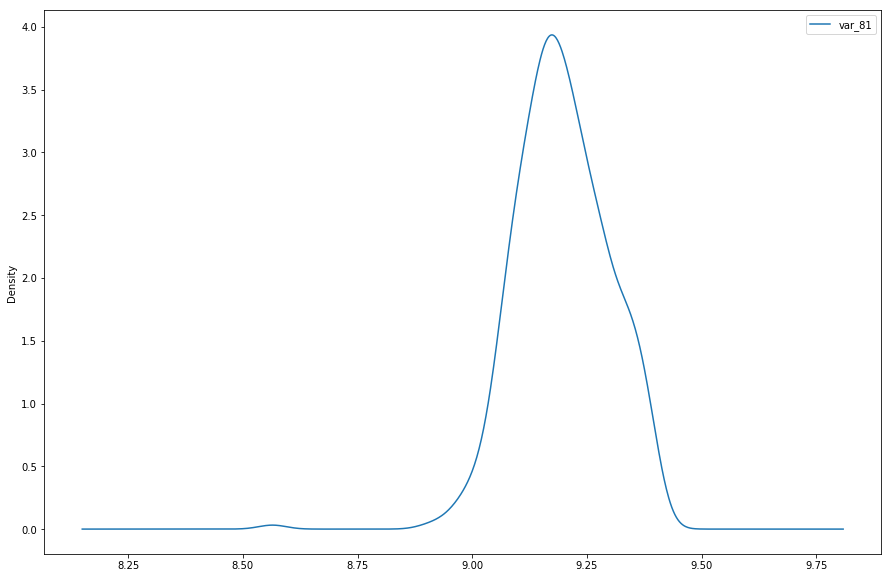

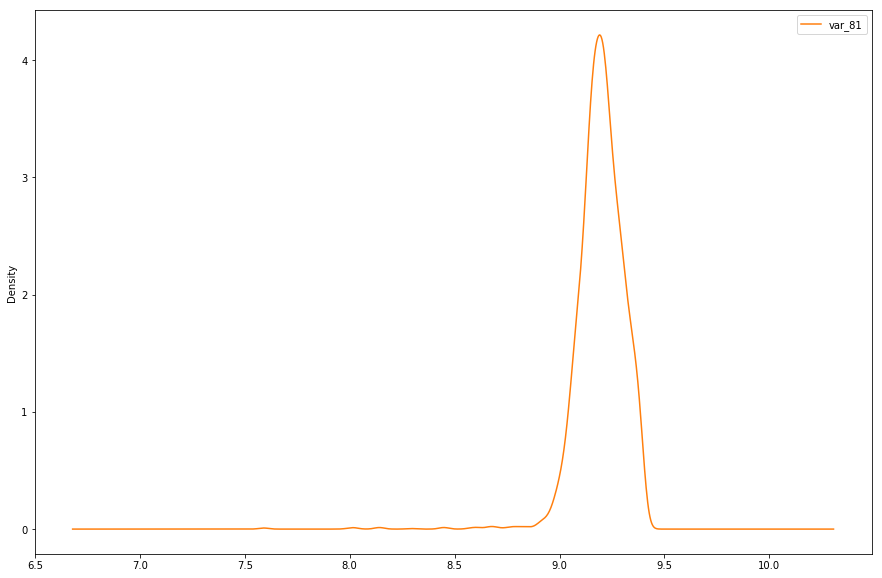

In [159]:
colors = plt.cm.datad["tab20"]['listed']
tmp[train_label==1][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[0])
tmp[train_label==0][vars_].reset_index(drop=True).plot(kind='kde',figsize=(15, 10), color=colors[2])

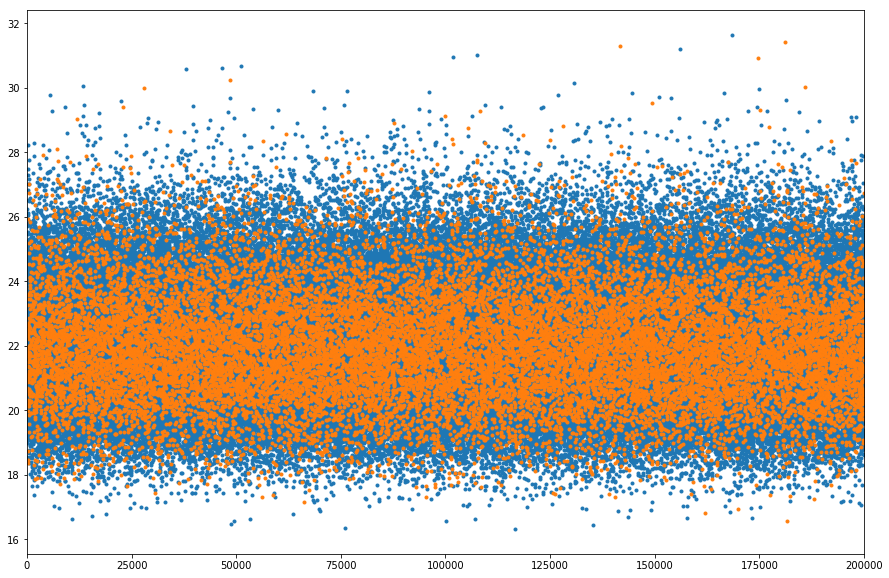

In [44]:
train_df[170][train_label==0].plot(figsize=(15, 10), color=colors[0],style='.')
train_df[170][train_label==1].plot(figsize=(15, 10), color=colors[2],style='.')

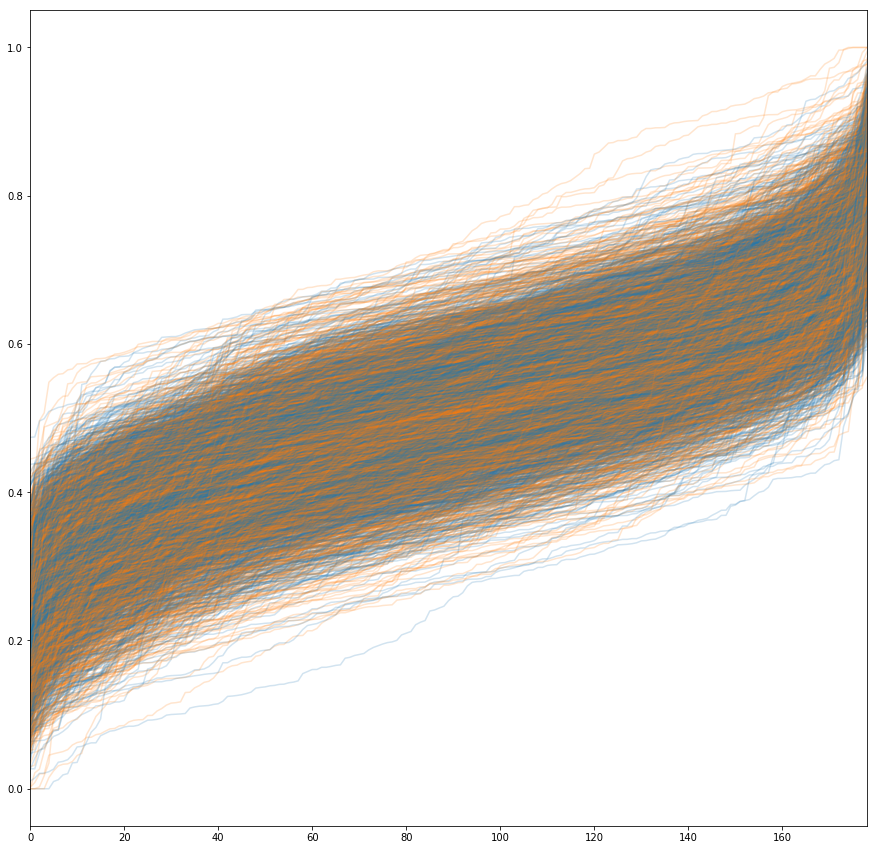

In [43]:
from tqdm import tqdm
colors = plt.cm.datad["tab20"]['listed']
for plotcount in range(6000, 8000):
    scaleddf_train.iloc[negative_index[plotcount+332],:].plot(figsize=(15, 15), color=colors[0], alpha=0.2)
    scaleddf_train.iloc[positive_index[plotcount-36],:].plot(figsize=(15, 15), color=colors[2], alpha=0.2)

In [47]:
train_df[train_df.target==1]
train_df.columns.index

AttributeError: 'Index' object has no attribute 'index'

In [41]:
var_0=pd.DataFrame(data={'index':train_df.index.values,'data':train_df['var_0'].values,'target':train_df['target'].values})
var_190=pd.DataFrame(data={'index':train_df.index.values,'data':train_df['var_41'].values,'target':train_df['target'].values})

In [42]:
var_0_sorted=var_0.sort_values('data', ascending=True).reset_index(drop=True)
var_190_sorted=var_190.sort_values('data', ascending=True).reset_index(drop=True)

In [110]:
var_190_sorted[:100000]['target'].mean()

NameError: name 'var_190_sorted' is not defined

In [3]:
ftz=['var_7','var_10','var_14','var_17','var_27','var_30','var_38','var_41','var_47','var_84','var_98','var_100','var_103','var_120','var_124','var_126','var_136','var_140','var_158','var_161','var_185']
rest = [f for f in train_df.columns if f not in ['ID_code', 'target']+ftz]

train_label=train_df['target']
train_df=train_df[rest]
test_df=test_df[rest]

In [4]:
def func(tr):
    train_d=tr.copy()
    #vars_=['var_81','var_53','var_2','var_0','var_12','var_139','var_146']
    
    train_d['new_81']= np.apply_along_axis(lambda x: x<=13.3,0,train_d['var_81'].values).astype(int)
    #train_d['new_81']=train_d['new_81']+1

    train_d['new_53']= np.apply_along_axis(lambda x: x<7,0,train_d['var_53'].values).astype(int)
    #train_d['new_53']=train_d['new_53']+1

    train_d['new_2']= np.apply_along_axis(lambda x: x>=15,0,train_d['var_2'].values).astype(int)
    #train_d['new_2']=train_d['new_2']+1

    train_d['new_0']= np.apply_along_axis(lambda x: x>=13.8,0,train_d['var_0'].values).astype(int)
    #train_d['new_0']=train_d['new_0']+1

    train_d['new_12']= np.apply_along_axis(lambda x: x<13.8,0,train_d['var_12'].values).astype(int)
    #train_d['new_12']=train_d['new_12']+1

    train_d['new_139']= np.apply_along_axis(lambda x: x<=-0.1,0,train_d['var_139'].values).astype(int)
    #train_d['new_139']=train_d['new_139']+1

    train_d['new_146']= np.apply_along_axis(lambda x: x<=8.5,0,train_d['var_146'].values).astype(int)
    #train_d['new_146']=train_d['new_146']+1
    
    #train_d['new_76']= np.apply_along_axis(lambda x: x<=-1.8,0,train_d['var_76'].values).astype(int)
    
    train_d['new_22']= np.apply_along_axis(lambda x: x<=8,0,train_d['var_22'].values).astype(int)
    
    train_d['new_26']= np.apply_along_axis(lambda x: x<=0.15,0,train_d['var_26'].values).astype(int)
    
    train_d['new_53']= np.apply_along_axis(lambda x: x<=6.9,0,train_d['var_53'].values).astype(int)
    
    train_d['new_110']= np.apply_along_axis(lambda x: x<=10,0,train_d['var_110'].values).astype(int)
    
    train_d['new_6']= np.apply_along_axis(lambda x: x>=6.2,0,train_d['var_6'].values).astype(int)
    
    train_d['new_22']= np.apply_along_axis(lambda x: x<=8.4,0,train_d['var_22'].values).astype(int)
    return train_d
#train_df['new_6']= np.apply_along_axis(lambda x: x<14,0,train_df['var_6'].values).astype(int)
#train_df['new_6']=train_df['new_6']+1

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(train_df, train_label, test_size=0.2, random_state=1011051)

In [6]:
X_train=func(X_train)
X_test=func(X_test)
test_df=func(test_df)
X_test.shape,X_train.shape,test_df.shape

((40000, 190), (160000, 190), (200000, 190))

In [59]:
scaleddf_train.loc[target==1,['mean_1']]

mean_1
13      1.976367
29      1.807338
63      2.078684
65      2.022590
71      2.358578
72      1.876794
84      1.885074
99      2.152371
119     1.874593
120     2.189831
130     1.784775
142     1.904796
178     2.003802
207     2.091858
223     1.956720
234     1.978407
235     2.127645
236     2.010701
239     2.182707
242     1.899357
252     2.158083
260     2.091916
284     1.937970
301     1.780424
309     2.180656
319     1.874021
324     2.054919
330     1.882743
332     1.953989
333     1.896341
...          ...
199730  2.161904
199737  1.738756
199754  2.142241
199759  2.033445
199779  2.112790
199785  2.194577
199792  2.036794
199794  1.977911
199803  2.082780
199807  2.109604
199810  1.905953
199812  2.088379
199813  1.935148
199821  2.221187
199833  1.888938
199836  2.200324
199844  1.925640
199849  1.891147
199855  1.853188
199869  2.198533
199877  1.921910
199892  1.633435
199897  2.312818
199923  2.030494
199953  2.205613
199966  2.077691
199976  1.829580
199981  2.126600
199986  2.060382
199990  2.169837

[20098 rows x 1 columns]

In [8]:
test_df

var_0    var_1    var_2    var_3    var_4    var_5   var_6   var_8  \
0       11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805  5.8493  2.1337   
1        8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117  6.0196 -4.4131   
2        5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052  4.8950  1.5233   
3        8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744  4.9397  3.3755   
4       11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848  6.8595  2.9890   
5        5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761  4.2467  1.8790   
6        8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073  4.1670 -4.3004   
7       17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449  5.9596 -4.8068   
8        6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607  4.3386  2.5883   
9       10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018  3.4508 -1.4112   
10       8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678  5.5184  2.8032   
11      10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802  5.5515 -0.1714   
12      12.7465  -4.9467  15.5490   6.4580  13.7572 -25.5371  4.4893  3.1754   
13      11.7836   1.9979  10.3347   7.8857  13.1020   5.0167  4.9548  3.5911   
14       7.0360   1.6797   9.3865   3.2605  10.7569  -8.0802  4.7885  0.6459   
15      14.8595  -4.5378  13.6483   5.6480   9.9144   1.5190  5.0358 -2.5419   
16      14.1732  -5.1490   9.7591   3.7316  10.3700 -21.9202  7.7130  0.4680   
17       9.0936  -8.7414  17.1160   6.0126   9.2144  -3.6761  4.6477  1.7687   
18      15.7875   0.1671  10.7782   3.8521   9.1190  11.0196  6.1113 -1.0728   
19      13.3874   1.0716   8.8767   7.8374  11.6404   6.2512  4.8837  4.3871   
20       8.0259  -4.6740   8.6431   2.2198  11.4555 -14.0227  6.9192  0.4283   
21      14.3356   0.2317   9.5604   5.7603  10.3184  -6.4721  4.6898  1.8342   
22      10.4255  -6.1758  12.4846   7.9845   9.7032 -14.5969  4.4173 -0.5899   
23      12.3322  -6.3835   7.2471   5.0403  10.0875  -1.5252  5.8230 -3.8454   
24      14.1844  -9.1044   9.7453   9.2638   9.3302   2.6818  5.4711  2.2065   
25      10.0029   0.2530   7.5335   6.9343  11.6866  -6.5147  6.7327 -6.6497   
26       6.9056  -4.8626  11.8932   5.3693  11.2551 -18.9716  5.5991  5.5612   
27       8.7562  -3.0647  11.7990   9.2162  10.9847 -22.4902  4.2991  3.3233   
28       9.7243  -1.5151  11.5582   5.7360  12.1907   6.9664  4.4125 -3.9683   
29      13.2430   1.2738  10.4245   3.1863  11.4951  -1.4755  5.1005  1.7115   
...         ...      ...      ...      ...      ...      ...     ...     ...   
199970  12.7260  -1.6706  12.3598   9.1114  10.1868  -9.5857  5.3494  2.0626   
199971   9.4700  -6.7655  12.6591   9.1842  11.8260   0.0264  5.0633  2.4171   
199972  13.3243   1.0870   8.4555   3.6929  11.2423   1.3986  4.4765 -2.6573   
199973  14.2830  -1.8421  11.3664   8.5772   8.8645 -13.8986  4.1603  5.6445   
199974   4.5171  -5.2068   7.6007   8.1426  10.4433 -17.2322  4.4205 -1.0196   
199975  13.4796   2.7000  10.9653   9.1581  13.2959  -3.0995  5.1483  1.2932   
199976  12.6337  -6.9793   9.8703   9.9180  10.8092   2.5809  6.7764  4.1498   
199977  10.8078  -4.6108   9.0021   9.8910  12.4514  -3.7566  4.2958  0.8806   
199978   9.9317  -2.2815  11.1707   5.6826  12.7396  -4.0659  6.2569 -2.1645   
199979  10.5933  -1.2672  13.6817   6.3789  12.8649  -5.4964  6.4800  4.0315   
199980  13.4136   5.3912   9.6202   8.5025  12.0951  11.3431  5.8323 -3.1511   
199981   7.9218  -5.7464  11.4171   6.7972  11.6260  -8.7730  5.4601  5.1918   
199982   7.2189   1.6606  10.4651   4.4382  10.5562  -5.2083  4.7197 -8.1002   
199983  11.8527   5.4321  12.7268  10.2392  12.4740 -14.6939  6.6544 -0.4182   
199984  12.7445  -6.1135   9.9046   7.5790  14.8852   4.5083  6.3353 -4.0102   
199985  14.8983   2.1302   7.4747   7.1744  11.8252  13.1758  5.1614 -4.8184   
199986  19.2884  -2.8384  11.9149   6.6611  12.3112  12.9244  5.6492  5.3597   
199987  11.2942   3.6321  15.3300   6.6904  10.9223  -5.6537  6.0221 -0.5163   
199988   6

In [4]:

from sklearn import mixture
from tqdm import tqdm

tmp=pd.DataFrame()
#gauss_vars=['var_81']
gauss_vars=['var_77','var_5','var_55','var_79','var_164','var_41','var_196','var_96'
 ,'var_94','var_82','var_134','var_19','var_30','var_112','var_37'
 ,'var_130','var_119','var_78','var_187','var_90','var_61','var_136'
 ,'var_32','var_20','var_8','var_47','var_1','var_151','var_27','var_18'
 ,'var_128','var_3','var_49','var_137','var_91','var_145','var_125'
 ,'var_14','var_97','var_175','var_189','var_69','var_135','var_156'
 ,'var_51','var_70','var_176','var_45','var_9','var_24','var_15','var_54'
 ,'var_160','var_71','var_84','var_199','var_180','var_111','var_186'
 ,'var_178','var_38','var_184','var_182','var_60','var_53','var_162'
 ,'var_4','var_120','var_22','var_85','var_103','var_144','var_40'
 ,'var_107','var_140','var_170','var_127','var_10','var_147','var_161']
for f in tqdm(gauss_vars):
    gauss = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=200,n_init=100).fit(train_df.loc[train_label==1,f].values.reshape(-1,1))
    tmp['count']=gauss.predict(train_df[f].values.reshape(-1,1))
    c

100%|██████████| 80/80 [05:24<00:00,  4.03s/it]


In [5]:
train_df['var_161_c']

0         62059
1         55418
2         55418
3         55418
4         82523
5         62059
6         82523
7         62059
8         55418
9         62059
10        62059
11        62059
12        55418
13        55418
14        82523
15        62059
16        55418
17        62059
18        62059
19        62059
20        55418
21        62059
22        62059
23        82523
24        82523
25        82523
26        55418
27        82523
28        82523
29        62059
          ...  
199970    82523
199971    62059
199972    55418
199973    55418
199974    55418
199975    55418
199976    82523
199977    82523
199978    62059
199979    55418
199980    62059
199981    62059
199982    82523
199983    55418
199984    82523
199985    82523
199986    82523
199987    62059
199988    82523
199989    62059
199990    82523
199991    55418
199992    82523
199993    55418
199994    82523
199995    82523
199996    82523
199997    62059
199998    82523
199999    62059
Name: var_161_c, Length:

In [24]:
tmp['count'].value_counts()

2    70238
1    67266
0    62496
Name: count, dtype: int64

In [66]:
from sklearn import mixture
gauss = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=200,n_init=20)
gauss.fit(X_train.loc[y_train==1,'var_81'].values.reshape(-1,1))

gauss1=np.random.normal(gauss.means_[0,0],gauss.covariances_[0,0,0],len(y_train[y_train==1]))
gauss2=np.random.normal(gauss.means_[1,0],gauss.covariances_[1,0,0],len(y_train[y_train==1]))
gauss3=np.random.normal(gauss.means_[2,0],gauss.covariances_[2,0,0],len(y_train[y_train==1]))

gauss1_val=np.random.normal(gauss.means_[0,0],gauss.covariances_[0,0,0],len(y_test[y_test==1]))
gauss2_val=np.random.normal(gauss.means_[1,0],gauss.covariances_[1,0,0],len(y_test[y_test==1]))
gauss3_val=np.random.normal(gauss.means_[2,0],gauss.covariances_[2,0,0],len(y_test[y_test==1]))

gauss = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=200,n_init=20)
gauss.fit(X_train.loc[y_train==0,'var_81'].values.reshape(-1,1))

gauss4=np.random.normal(gauss.means_[0,0],gauss.covariances_[0,0,0],len(y_train[y_train==0]))
gauss5=np.random.normal(gauss.means_[1,0],gauss.covariances_[1,0,0],len(y_train[y_train==0]))
gauss6=np.random.normal(gauss.means_[2,0],gauss.covariances_[2,0,0],len(y_train[y_train==0]))

gauss4_val=np.random.normal(gauss.means_[0,0],gauss.covariances_[0,0,0],len(y_test[y_test==0]))
gauss5_val=np.random.normal(gauss.means_[1,0],gauss.covariances_[1,0,0],len(y_test[y_test==0]))
gauss6_val=np.random.normal(gauss.means_[2,0],gauss.covariances_[2,0,0],len(y_test[y_test==0]))

In [67]:
X_train['var1']=np.concatenate([gauss1,gauss4],axis=0)
X_train['var2']=np.concatenate([gauss2,gauss5],axis=0)
#X_train['var3']=np.concatenate([gauss3,gauss6],axis=0)

X_test['var1']=np.concatenate([gauss1_val,gauss4_val],axis=0)
X_test['var2']=np.concatenate([gauss2_val,gauss5_val],axis=0)
#X_test['var3']=np.concatenate([gauss3_val,gauss6_val],axis=0)

Y_train=np.concatenate([np.ones(len(y_train[y_train==1])),np.zeros(len(y_train[y_train==0]))],axis=0)
Y_test=np.concatenate([np.ones(len(y_train[y_train==1])),np.zeros(len(y_train[y_train==0]))],axis=0)

X_train=X_train[['var1','var_2','var_3']]
X_test=X_test[['var1','var_2','var_3']]

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [11]:
test_df['var_81']

0         16.9060
1         14.0406
2         14.3299
3         15.4375
4         16.7661
5         16.0807
6         12.5293
7         18.7879
8         16.0976
9         15.2616
10        16.9251
11        13.6884
12        14.4066
13        16.9690
14        12.5301
15        16.7914
16        12.5129
17        13.0824
18        13.1566
19        13.9349
20        17.8319
21        11.0789
22        16.3863
23        15.5320
24        16.0228
25        15.7230
26        16.1643
27        15.9620
28        12.4257
29        13.4811
           ...   
199970    17.2655
199971    17.9142
199972    16.4620
199973    12.9890
199974    14.7538
199975    16.5742
199976    16.7383
199977    10.7726
199978    15.8099
199979    15.6217
199980    12.8908
199981    15.4766
199982    19.4998
199983    14.1630
199984    14.9644
199985    12.4067
199986    17.8015
199987    11.6298
199988    19.2967
199989    15.3117
199990    12.7976
199991    16.6168
199992    16.1116
199993    16.8361
199994    

In [45]:
from sklearn import mixture
from tqdm import tqdm

tmp=[]
gauss_vars=['var_0','var_1','var_2','var_12','var_80','var_81','var_6','var_13','var_139','var_53','var_188']
for f in tqdm(gauss_vars):
    gauss = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=200,n_init=20)
    gauss.fit(train_df[f].values.reshape(-1,1))
    train_df[f+'_gauss']=gauss.predict(train_df[f].values.reshape(-1,1))
    #=tmp[:,0]
    #train_df[f+'_gauss1']=tmp[:,1]
    #train_df[f+'_gauss2']=tmp[:,2]

100%|██████████| 11/11 [01:28<00:00,  7.82s/it]


In [71]:
X_test.reset_index(drop=True)

var1    var_2    var_3
0      13.252461  12.3664   3.2757
1      15.487315   9.4970   3.5340
2      16.360718  16.0610   6.2559
3      12.990116  11.1430   8.8037
4      13.602135  10.4122   9.9510
5      13.686457  10.5195   8.1707
6      14.789959  11.0838   8.5478
7      11.530755  14.9335   5.3385
8      14.990332   8.4067   3.0541
9      14.218166  16.8975  10.2337
10     12.814649   8.0530   7.0811
11     15.667766  10.0883   8.5958
12     11.677464  11.8661   6.5393
13     13.800992  10.8131   8.2516
14     10.630487  10.7206   6.8625
15     14.743846   7.9585   5.5136
16     14.899761  13.4063   7.0644
17     13.739076  12.9460   8.1292
18     15.415494  10.4068   8.1974
19     15.646705  11.5972  10.8047
20     12.843771  10.3854   7.0876
21     15.344055  11.7802  10.2114
22     14.888175  12.6304  10.3187
23     14.853131  11.5479   6.9014
24     17.396042  10.3993   5.1812
25     14.753621  14.3787   7.8025
26     13.372791   9.6190   9.4072
27     14.088854   9.4713   5.4467
28     16.557999  11.5604   8.0217
29     15.133611  10.6557   8.0854
...          ...      ...      ...
39970  15.022952   9.8443   6.4986
39971  16.140809   6.4592  10.4809
39972  14.541576  17.2094   8.2899
39973  16.446920   8.2732   8.8518
39974  15.294536   9.8261   6.7327
39975  13.609441   7.3060   2.0048
39976  13.754607  11.8115   4.2507
39977  15.530241   8.4709   6.1794
39978  16.023413  13.2933  11.6385
39979  15.174419  14.8065   7.1443
39980  14.034801   8.4349   4.6120
39981  14.677687  12.7891  10.9123
39982  15.928011   8.6454   6.0836
39983  15.558964   8.8614   6.2472
39984  16.030533   9.9914   6.8963
39985  15.474985  11.6044   5.0022
39986  15.867415   9.7039   4.1035
39987  12.976008   8.5789   4.6034
39988  14.597427   8.7925   9.0154
39989  14.814748  12.1073   3.0708
39990  13.642655  12.6047   9.5867
39991  13.596497  13.3854   3.5828
39992  15.098920   7.8230   7.5891
39993  16.464685  12.3965   7.7793
39994  14.912754  10.4192   4.1483
39995  16.134833   6.3896   9.0955
39996  14.723551   8.0977   6.0631
39997  15.473614   7.7752   9.8208
39998  15.044101   8.7206   8.9592
39999  13.229303  10.1412   5.1156

[40000 rows x 3 columns]

In [65]:
vars_=['var_23', 'var_98', 'var_103', 'var_114', 'var_166','var_81']
#train_df[train_df.target==1][vars_]
cols=np.argwhere(train_df[train_df.target==1].values==-11.3650)[:,1]
rows=np.argwhere(train_df[train_df.target==1].values==-11.3650)[:,0]

In [191]:
def build_histograms(df):
    #df_X = (df.replace(0, np.nan).apply(np.log) * 10).round()
    df_X = np.floor(df.apply(lambda x: np.abs(x)))
    start = int(df_X.min().min())
    stop = int(df_X.max().max())
    return pd.DataFrame(data={f'bucket{cnt}': (df_X == cnt).sum() for cnt in range(start, stop + 1)})

df_hist = build_histograms(train_df[rest])

In [ ]:
df_hist

In [ ]:
#Tsne Train Visualisation
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne_train = TSNE(perplexity=30,n_iter =1200,n_components=2,n_jobs=8).fit_transform(df_hist)

plt.figure(figsize=(20, 15))
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.scatter(x=tsne_train[:,0],y=tsne_train[:,1],marker='.')
plt.clim(-0.5, 9.5)
plt.show()

In [ ]:
import umap

umap_train = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df_hist.values)

plt.figure(figsize=(25, 20))
ax = plt.gca()
kmeans.labels_
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.scatter(x=umap_train[:,0],y=umap_train[:,1],marker='.')
plt.clim(-0.5, 9.5)
#plt.scatter(x=umap_train[:,0],y=umap_train[:,1],c=kmeans.labels_, cmap=plt.cm.get_cmap("jet", 12),marker='.')
#plt.colorbar(ticks=range(12))
plt.show()

In [177]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
num_clusters=11
data=umap_train
data=preprocessing.StandardScaler().fit_transform(data)
kmeans = KMeans(n_clusters=num_clusters, random_state=1346).fit(data)

In [ ]:
['var_41', 'var_30', 'var_185', 
       'var_27', 'var_103', 'var_100', 
       'var_38','var_161']

In [134]:
for i in range(num_clusters):
    tmp=np.argwhere(kmeans.labels_==i)[:,0]
    if 161 in tmp:
        print(i)

11


In [179]:
tmp=np.argwhere(kmeans.labels_==6)[:,0]
var_=train_df[rest].columns[tmp].values
var_

array(['var_23', 'var_98', 'var_103', 'var_114', 'var_166'], dtype=object)

In [126]:
np.argwhere(kmeans.labels_==6)[:,0]

array([  0,   2,   4,  31,  46,  94, 104, 121, 143, 146, 175, 177, 181])

In [9]:
ftz=['var_7','var_10','var_14','var_17','var_27','var_30','var_38','var_41','var_47','var_84','var_98','var_100','var_103','var_120','var_124','var_126','var_136','var_140','var_158','var_161','var_185']
rest = [f for f in train_df.columns if f not in ['ID_code', 'target']+ftz]


In [11]:
train_label=train_df['target']
train_df=train_df[rest+['new']]
#test_df=test_df[rest+['new']]

KeyError: 'target'

In [12]:
train_df['new']

new  new
0         0    0
1         0    0
2         2    2
3         1    1
4         1    1
5         1    1
6         2    2
7         2    2
8         0    0
9         0    0
10        0    0
11        1    1
12        2    2
13        1    1
14        0    0
15        2    2
16        2    2
17        0    0
18        0    0
19        2    2
20        0    0
21        0    0
22        1    1
23        2    2
24        1    1
25        0    0
26        0    0
27        2    2
28        0    0
29        0    0
...     ...  ...
199970    2    2
199971    1    1
199972    0    0
199973    0    0
199974    0    0
199975    2    2
199976    1    1
199977    0    0
199978    1    1
199979    0    0
199980    0    0
199981    1    1
199982    0    0
199983    2    2
199984    1    1
199985    1    1
199986    1    1
199987    2    2
199988    0    0
199989    2    2
199990    0    0
199991    0    0
199992    2    2
199993    2    2
199994    1    1
199995    0    0
199996    2    2
199997    0    0
199998    2    2
199999    2    2

[200000 rows x 2 columns]

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.fit_transform(test_df)
#X_all = pd.DataFrame(x_scaled).set_index(X_all.index)

/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [93]:
train_scaled[:,0].max()

3.169390989067543

In [13]:
for i,f in enumerate(rest):
    train_df[f+'_pos']=np.apply_along_axis(lambda x: (x>2.5)&(x<3),0,train_scaled[:,i]).astype(int)
    train_df[f+'_neg']=np.apply_along_axis(lambda x: (x>-3)&(x<-2),0,train_scaled[:,i]).astype(int)


#train_df['neg']=np.apply_along_axis(lambda x: np.sum((x<=-1)&(x>=-3)),1,train_scaled)
#train_df['pos']=np.apply_along_axis(lambda x: np.sum((x<3)&(x>=1)),1,train_scaled)

#test_df['neg']=np.apply_along_axis(lambda x: np.sum((x<=-1)&(x>-3)),1,test_scaled)
#test_df['pos']=np.apply_along_axis(lambda x: np.sum((x<3)&(x>=1)),1,test_scaled)
train_df['neg_sum']=train_df[[f for f in train_df.columns if f.endswith('_neg')]].sum(axis=1)
train_df['neg_mean']=train_df[[f for f in train_df.columns if f.endswith('_neg')]].mean(axis=1)

train_df['pos_sum']=train_df[[f for f in train_df.columns if f.endswith('_pos')]].sum(axis=1)
train_df['pos_mean']=train_df[[f for f in train_df.columns if f.endswith('_pos')]].mean(axis=1)

In [12]:
train_df['pos_sum']

0         3
1         3
2         1
3         3
4         5
5         3
6         0
7         5
8         3
9         3
10        5
11        1
12        8
13        4
14        7
15        1
16        2
17        1
18        2
19        1
20        3
21        4
22        2
23        6
24        3
25        6
26        2
27        2
28        0
29        2
         ..
199970    3
199971    6
199972    2
199973    3
199974    3
199975    2
199976    2
199977    2
199978    2
199979    4
199980    1
199981    4
199982    6
199983    2
199984    5
199985    5
199986    4
199987    5
199988    5
199989    2
199990    6
199991    4
199992    2
199993    1
199994    5
199995    4
199996    5
199997    5
199998    6
199999    4
Name: pos_sum, Length: 200000, dtype: int64

In [98]:
train_label[(train_scaled[:,1]<=3) & (train_scaled[:,1]>=2.5)].mean()

0.12244897959183673

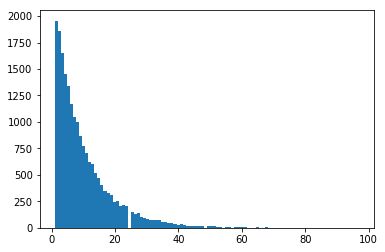

In [190]:
feats=['var_23', 'var_98', 'var_103', 'var_114', 'var_166']
tmp=train_df[feats]
tmp.reset_index(inplace=True)
tmp.rename(columns={"index": "order"}, inplace=True)

x = tmp[train_df.target == 1]["order"] # All positive rows
x2 = np.diff(x) # distance between 2 row orders

import matplotlib.pyplot as plt
plt.hist(x2, bins=100);

In [20]:
train_scaled[:,1]

array([-1.27373702, -0.62213756, -0.2760664 , ..., -0.84546901,
       -1.72398014, -1.00810962])

In [19]:
train_df[['var_1','var_1_neg','var_1_pos']]

var_1  var_1_neg  var_1_pos
0      -6.7863          0          0
1      -4.1473          0          0
2      -2.7457          0          0
3      -2.1518          0          0
4      -1.4834          0          0
5      -2.3182          0          0
6      -0.0832          0          0
7      -7.9881          0          0
8       2.4426          0          0
9       1.9743          0          0
10     -0.5447          0          0
11     -7.9750          0          0
12     -4.6154          0          0
13      1.5934          0          0
14      5.0514          0          0
15      2.6562          0          0
16      0.2689          0          0
17     -1.8128          0          0
18      1.2646          0          0
19     -0.7863          0          0
20     -2.0221          0          0
21      1.4806          0          0
22      0.1925          0          0
23     -9.3439          0          0
24     -3.7285          0          0
25     -5.6854          0          0
26     -4.4950          0          0
27     -9.9800          1          0
28      4.5262          0          0
29     -2.6064          0          0
...        ...        ...        ...
199970 -2.5687          0          0
199971 -3.9178          0          0
199972 -2.5972          0          0
199973 -0.4604          0          0
199974 -5.7847          0          0
199975  1.0548          0          0
199976 -2.8485          0          0
199977 -0.8093          0          0
199978 -0.8787          0          0
199979 -2.9344          0          0
199980  6.2271          0          0
199981  0.6386          0          0
199982 -2.3596          0          0
199983  2.8260          0          0
199984  0.3745          0          0
199985 -3.6379          0          0
199986 -8.7800          0          0
199987 -1.9184          0          0
199988 -8.3545          0          0
199989 -4.5356          0          0
199990  1.8568          0          0
199991  2.5523          0          0
199992  2.6918          0          0
199993 -5.8006          0          0
199994 -5.8821          0          0
199995 -0.4956          0          0
199996 -2.4484          0          0
199997 -5.0518          0          0
199998 -8.6098          0          0
199999 -5.7105          0          0

[200000 rows x 3 columns]

In [122]:
reverse_list = [0,1,2,3,4,5,6,7,8,11,15,16,18,19,
                22,24,25,26,27,41,29,
                32,35,37,40,48,49,47,
                55,51,52,53,60,61,62,103,65,66,67,69,
                70,71,74,78,79,
                82,84,89,90,91,94,95,96,97,99,
                105,106,110,111,112,118,119,125,128,
                130,133,134,135,137,
                140,144,145,147,151,155,157,159,
                161,162,163,164,167,168,
                170,171,173,175,176,179,
                180,181,184,185,187,189,
                190,191,195,196,199]

train_df.iloc[:,reverse_list] = train_df.iloc[:,reverse_list]*-1

'var_39'

In [162]:
f=72
train_label[(train_scaled[:,f]<2.9) & ((train_scaled[:,f]>2.6))].mean(),\
train_label[(train_scaled[:,f]<-2.6) & ((train_scaled[:,f]>-2.9))].mean(),rest[f]

(0.07894736842105263, 0.0, 'var_81')

In [31]:
ftz = ['var_41', 'var_30', 'var_185', 
       'var_27', 'var_103', 'var_100', 
       'var_38', 'var_17','var_161']

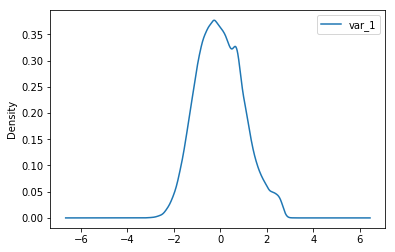

In [37]:
pd.DataFrame(data={'var_1':train_scaled[:,0]}).plot(kind='kde')

In [5]:
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold

bootstrap=True
subsample=1
num_bagg=20
shuffle=True
test_id=200000
num_boost_round=100000

final_cv_train = np.zeros(len(train_label))
final_cv_pred = np.zeros(test_id)

NFOLDS = 5

random_seeds=[2017,2018,2019,1011,41,1994,34,31,2,1001,45,20006,567,8941,14779,1956,21269,7,1111,11587]
for s in range(0,num_bagg):
    kfold = StratifiedKFold(NFOLDS, shuffle=True, random_state=random_seeds[s])
    #ix = np.random.choice(len(train_label), int(subsample * len(train_label)), bootstrap)
    #if not shuffle:
    #    ix=np.sort(ix)
    cv_train = np.zeros(len(train_label))
    cv_pred = np.zeros(test_id)
    
    params = {
    'n_jobs' : -1 ,
    'device': 'cpu', 
    "objective": "binary",
    'metric':'binary_logloss',
    "boosting_type": "gbdt", 
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 2**2-1,
    'bagging_fraction': 0.4,
    'feature_fraction': 0.05,
    'bagging_freq': 3,
    'boost_from_average':'false',
    'min_child_samples': 100,
    #'min_child_weight': 10.0,
    #'min_split_gain': 0.1, 
    #'lambda_l1':0.05,
    #'lambda_l2':0.05,
    #"max_bin": 64,
    "seed":s+1,
    'verbosity': 1
    }
    

    kf = kfold.split(train_df, train_label)

    best_trees = []
    fold_scores = []

    for i, (train_fold, validate) in enumerate(kf):
        print("\n\nFold #:",i+1)
        #train_fold=np.random.permutation(np.concatenate((train_fold,index_zero)))
        X_train, X_validate, label_train, label_validate = train_df.iloc[train_fold, :], train_df.iloc[validate, :], train_label[train_fold], train_label[validate]
        dtrain = lgbm.Dataset(X_train, label_train)
        
        del X_train,label_train
        gc.collect()
        
        dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
        bst = lgbm.train(params, dtrain,valid_sets=[dtrain,dvalid],valid_names=['train','valid'],num_boost_round=num_boost_round, verbose_eval=1000, early_stopping_rounds=3000)
        best_trees.append(bst.best_iteration)
        cv_train[validate] += bst.predict(X_validate,num_iteration=bst.best_iteration)
        score = roc_auc_score(label_validate, cv_train[validate])
        print ("Score for each fold",score)
        fold_scores.append(score)
    
        # Free some memory
        del dtrain,dvalid, X_validate, label_validate
        gc.collect()
        
        
        cv_pred += bst.predict(test_df, num_iteration=bst.best_iteration)

    cv_pred /= NFOLDS
    final_cv_train += cv_train
    final_cv_pred += cv_pred

    print("\n\nstr: ",np.array(fold_scores).std(), "fold scores: ",fold_scores)
    print("cv score: ", roc_auc_score(train_label, cv_train))
    print("current score: ", roc_auc_score(train_label, final_cv_train / (s+1)), s+1)




Fold #: 1
Training until validation scores don't improve for 3000 rounds.


KeyboardInterrupt: 

In [16]:
# plot feature importance
feat=train_df.columns
print("Features Importance...")
gain = bst.feature_importance('gain')
featureimp = pd.DataFrame({'feature':bst.feature_name(), 
                   'split':bst.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

plt.figure(figsize=(14,28))
sns.barplot(x="split", y="feature", data=featureimp)
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

Features Importance...


NameError: name 'bst' is not defined

In [74]:
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold

bootstrap=True
subsample=1
num_bagg=1
shuffle=True
test_id=200000
num_boost_round=100000

final_cv_train = np.zeros(len(train_label))
final_cv_pred = np.zeros(test_id)

NFOLDS = 5

random_seeds=[2017]
for s in range(0,num_bagg):
    kfold = StratifiedKFold(NFOLDS, shuffle=True, random_state=random_seeds[s])
    #ix = np.random.choice(len(train_label), int(subsample * len(train_label)), bootstrap)
    #if not shuffle:
    #    ix=np.sort(ix)
    cv_train = np.zeros(len(train_label))
    cv_pred = np.zeros(test_id)
    
    params = {
    'n_jobs' : -1 ,
    'device': 'cpu', 
    "objective": "binary",
    'metric':'binary_logloss',
    "boosting_type": "gbdt", 
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 2**2-1,
    'bagging_fraction': 0.4,
    'feature_fraction': 0.05,
    'bagging_freq': 3,
    'boost_from_average':'false',
    'min_child_samples': 100,
    #'min_child_weight': 10.0,
    #'min_split_gain': 0.1, 
    #'lambda_l1':0.05,
    #'lambda_l2':0.05,
    #"max_bin": 64,
    "seed":s+1,
    'verbosity': 1
    }
    

    kf = kfold.split(train_df, train_label)
    #train_df=pd.concant([train_df,scaleddf_train],axis=1)
    best_trees = []
    fold_scores = []

    for i, (train_fold, validate) in enumerate(kf):
        if i!=3:
            continue
        print("\n\nFold #:",i+1)
        #train_fold=np.random.permutation(np.concatenate((train_fold,index_zero)))
        X_train, X_validate, label_train, label_validate = train_df.iloc[train_fold, :], train_df.iloc[validate, :], train_label[train_fold], train_label[validate]
        dtrain = lgbm.Dataset(X_train, label_train)
        
        del X_train,label_train
        gc.collect()
        
        dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
        bst = lgbm.train(params, dtrain,valid_sets=[dtrain,dvalid],valid_names=['train','valid'],num_boost_round=num_boost_round, verbose_eval=1000, early_stopping_rounds=3000)
        best_trees.append(bst.best_iteration)
        cv_train[validate] += bst.predict(X_validate,num_iteration=bst.best_iteration)
        score = roc_auc_score(label_validate, cv_train[validate])
        print ("Score for each fold",score)
        fold_scores.append(score)
    
        # Free some memory
        del dtrain,dvalid, X_validate, label_validate
        gc.collect()
        
        
        cv_pred += bst.predict(test_df, num_iteration=bst.best_iteration)

    cv_pred /= NFOLDS
    final_cv_train += cv_train
    final_cv_pred += cv_pred

    print("\n\nstr: ",np.array(fold_scores).std(), "fold scores: ",fold_scores)
    print("cv score: ", roc_auc_score(train_label, cv_train))
    print("current score: ", roc_auc_score(train_label, final_cv_train / (s+1)), s+1)




Fold #: 4
Training until validation scores don't improve for 3000 rounds.
[1000]	train's binary_logloss: 0.270679	valid's binary_logloss: 0.273102
[2000]	train's binary_logloss: 0.251924	valid's binary_logloss: 0.255766
[3000]	train's binary_logloss: 0.239947	valid's binary_logloss: 0.245006
[4000]	train's binary_logloss: 0.231263	valid's binary_logloss: 0.237398
[5000]	train's binary_logloss: 0.224588	valid's binary_logloss: 0.23164
[6000]	train's binary_logloss: 0.219189	valid's binary_logloss: 0.227082
[7000]	train's binary_logloss: 0.214679	valid's binary_logloss: 0.223297
[8000]	train's binary_logloss: 0.210862	valid's binary_logloss: 0.220165
[9000]	train's binary_logloss: 0.207598	valid's binary_logloss: 0.217631
[10000]	train's binary_logloss: 0.204749	valid's binary_logloss: 0.215421
[11000]	train's binary_logloss: 0.202263	valid's binary_logloss: 0.213604
[12000]	train's binary_logloss: 0.20008	valid's binary_logloss: 0.211978
[13000]	train's binary_logloss: 0.198123	valid'

In [56]:
#train_df=pd.concat([train_df,scaleddf_train],axis=1)

#tmp1=(tmp.iloc[:,0:18])
min_=170
max_=190
train_df['min']=tmp.iloc[:,min_:max_].min(axis=1)
train_df['max']=tmp.iloc[:,min_:max_].max(axis=1)

train_df['std']=tmp.iloc[:,min_:max_].std(axis=1)
#train_df['mean']=tmp.iloc[:,min_:max_].mean(axis=1)

train_df['sum']=tmp.iloc[:,min_:max_].sum(axis=1)

train_df['0.25']=tmp.iloc[:,min_:max_].quantile(0.25,axis=1)
train_df['0.1']=tmp.iloc[:,min_:max_].quantile(0.1,axis=1)
train_df['0.3']=tmp.iloc[:,min_:max_].quantile(0.3,axis=1)
train_df['0.5']=tmp.iloc[:,min_:max_].quantile(0.5,axis=1)
train_df['0.75']=tmp.iloc[:min_:max_].quantile(0.75,axis=1)
train_df['0.9']=tmp.iloc[:,min_:max_].quantile(0.9,axis=1)

#train_df['0.9']=tmp.iloc[:,max_:]

#train_df['mean_1']=tmp.iloc[:,-max_:].mean(axis=1)

#train_df['0.25_1']=tmp.iloc[:,-max_:].quantile(0.25,axis=1)
#train_df['0.1_1']=tmp.iloc[:,-max_:].quantile(0.1,axis=1)


In [50]:
#train_df=train_df[[f for f in train_df.columns if f not in ['var_81','var_139','var_53','var_6','var_12']]]
#tmp.iloc[:,100:]
test_df.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_161_FE1', 'var_162_FE1', 'var_166_FE1', 'var_169_FE1',
       'var_175_FE1', 'var_181_FE1', 'var_189_FE1', 'var_192_FE1',
       'var_195_FE1', 'var_197_FE1'],
      dtype='object', length=264)

In [1]:
cats=['var_5_FE1', 'var_11_FE1', 'var_17_FE1', 'var_18_FE1',
       'var_19_FE1', 'var_21_FE1', 'var_30_FE1', 'var_40_FE1',
       'var_45_FE1', 'var_47_FE1', 'var_48_FE1', 'var_49_FE1',
       'var_51_FE1', 'var_54_FE1', 'var_61_FE1', 'var_67_FE1',
       'var_70_FE1', 'var_73_FE1', 'var_74_FE1', 'var_80_FE1',
       'var_82_FE1', 'var_83_FE1', 'var_84_FE1', 'var_86_FE1',
       'var_90_FE1', 'var_96_FE1', 'var_97_FE1', 'var_100_FE1',
       'var_101_FE1', 'var_102_FE1', 'var_117_FE1', 'var_118_FE1',
       'var_120_FE1', 'var_135_FE1', 'var_136_FE1', 'var_137_FE1',
       'var_139_FE1', 'var_141_FE1', 'var_142_FE1', 'var_147_FE1',
       'var_149_FE1', 'var_155_FE1', 'var_158_FE1', 'var_160_FE1',
       'var_167_FE1', 'var_173_FE1', 'var_176_FE1', 'var_178_FE1',
       'var_180_FE1', 'var_182_FE1', 'var_184_FE1', 'var_185_FE1',
       'var_187_FE1', 'var_196_FE1', 'var_199_FE1']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold

params = {
    'n_jobs' : -1 ,
    'device': 'cpu', 
    "objective": "binary",
    'metric':'auc',
    "boosting_type": "gbdt", 
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 3,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.9,
    'bagging_freq': 1,
    #'min_child_samples': 100,
    #'min_child_weight': 50.0,
    #'min_split_gain': 0.1, 
    #'lambda_l1':0.2,
    #'lambda_l2':0.2,
    #"max_bin": 64,
    "bagging_seed" : 121,
    "seed":5346,
    'verbosity': 1
    }


#rest = [f for f in train_df.columns if f not in ftz+['ID_code', 'target']]

#features=rest
#predictions = np.zeros(200000)
#oof = np.zeros(200000*0.2)

#train_df = pd.read_csv('input/train.csv')
#test_df = pd.read_csv('input/test.csv')
#target = train_df['target']

#train_df=pd.concat([train_df,scaleddf.iloc[:,201:]],axis=1).reset_index(drop=True)

X_train , X_test, y_train, y_test = train_test_split(train_df, train_label, test_size=0.2, random_state=16931)

#rest5 = [f for f in train_df.columns if f not in ['ID_code', 'target']+ftz]

#cols_=rest3
#X_train=FE_1(X_train,cols_)
#X_test=FE_1(X_test,cols_)
#for f in X_train.columns:
    #train_df[f+'_new']=pd.cut(train_df[f],250,labels=False)
    #X_train[f+'_c']=X_train[f].map(X_train[f].value_counts())
    #X_test[f+'_c']=X_test[f].map(X_test[f].value_counts())
    
#train_df=train.iloc[:,:200]
print(train_df.shape)
print(test_df.shape)
#X_train, y_train = augment_fast2(X_train.values, y_train.values,axis=0,t=1)
#print("augment done!")
#X_train = pd.DataFrame(X_train)
#X_train = X_train.add_prefix('var_')

trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)
clf = lgb.train(params, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=4000,early_stopping_rounds=3000)
oof= clf.predict(X_test, num_iteration=clf.best_iteration)
print("CV score: {:<8.5f}".format(roc_auc_score(y_test, oof)))
#res.append(val_idx)
#fold_importance_df = pd.DataFrame()
#fold_importance_df["feature"] = features
#fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
#fold_importance_df["fold"] = fold_ + 1
#predictions = clf.predict(test_df, num_iteration=clf.best_iteration)
#print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

(200000, 400)
(200000, 200)
Training until validation scores don't improve for 3000 rounds.
[4000]	training's auc: 0.889764	valid_1's auc: 0.878588
[8000]	training's auc: 0.910454	valid_1's auc: 0.897263


In [19]:
predictions = clf.predict(test_df, num_iteration=clf.best_iteration)

In [13]:
feat=train_df.columns
print("Features Importance...")
gain = clf.feature_importance('gain')
featureimp = pd.DataFrame({'feature':clf.feature_name(), 
                   'split':clf.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

print(featureimp.to_string())

Features Importance...
           feature  split      gain
81          var_81    106  2.597508
139        var_139    107  2.052161
12          var_12    110  1.824356
53          var_53    104  1.585963
110        var_110     95  1.521975
6            var_6    104  1.455206
146        var_146     96  1.452868
26          var_26     78  1.353857
22          var_22    107  1.340791
174        var_174     91  1.267275
99          var_99    104  1.253822
166        var_166     98  1.236038
76          var_76     94  1.167798
133        var_133    107  1.142445
2            var_2     98  1.135624
80          var_80     92  1.133854
198        var_198    115  1.126518
109        var_109     95  1.105864
190        var_190    108  1.097513
21          var_21     89  1.093282
78          var_78    105  1.080622
148        var_148     87  1.050325
13          var_13     78  1.031706
108        var_108    106  1.016331
34          var_34    102  1.009226
0            var_0     86  0.983198
165  

In [21]:
test_df

var_0    var_1    var_2    var_3    var_4    var_5   var_6   var_8  \
0       11.0656   7.7798  12.9536   9.4292  11.4327  -2.3805  5.8493  2.1337   
1        8.5304   1.2543  11.3047   5.1858   9.1974  -4.0117  6.0196 -4.4131   
2        5.4827 -10.3581  10.1407   7.0479  10.2628   9.8052  4.8950  1.5233   
3        8.5374  -1.3222  12.0220   6.5749   8.8458   3.1744  4.9397  3.3755   
4       11.7058  -0.1327  14.1295   7.7506   9.1035  -8.5848  6.8595  2.9890   
5        5.9862  -2.2913   8.6058   7.0685  14.2465  -8.6761  4.2467  1.8790   
6        8.4624  -6.1065   7.3603   8.2627  12.0104  -7.2073  4.1670 -4.3004   
7       17.3035  -2.4212  13.3989   8.3998  11.0777   9.6449  5.9596 -4.8068   
8        6.9856   0.8402  13.7161   4.7749   8.6784 -13.7607  4.3386  2.5883   
9       10.3811  -6.9348  14.6690   9.0941  11.9058 -10.8018  3.4508 -1.4112   
10       8.3431  -4.1427   9.1985   9.8229  11.2494   2.9678  5.5184  2.8032   
11      10.6137  -2.1898   8.9090   3.8014  13.8602  -5.9802  5.5515 -0.1714   
12      12.7465  -4.9467  15.5490   6.4580  13.7572 -25.5371  4.4893  3.1754   
13      11.7836   1.9979  10.3347   7.8857  13.1020   5.0167  4.9548  3.5911   
14       7.0360   1.6797   9.3865   3.2605  10.7569  -8.0802  4.7885  0.6459   
15      14.8595  -4.5378  13.6483   5.6480   9.9144   1.5190  5.0358 -2.5419   
16      14.1732  -5.1490   9.7591   3.7316  10.3700 -21.9202  7.7130  0.4680   
17       9.0936  -8.7414  17.1160   6.0126   9.2144  -3.6761  4.6477  1.7687   
18      15.7875   0.1671  10.7782   3.8521   9.1190  11.0196  6.1113 -1.0728   
19      13.3874   1.0716   8.8767   7.8374  11.6404   6.2512  4.8837  4.3871   
20       8.0259  -4.6740   8.6431   2.2198  11.4555 -14.0227  6.9192  0.4283   
21      14.3356   0.2317   9.5604   5.7603  10.3184  -6.4721  4.6898  1.8342   
22      10.4255  -6.1758  12.4846   7.9845   9.7032 -14.5969  4.4173 -0.5899   
23      12.3322  -6.3835   7.2471   5.0403  10.0875  -1.5252  5.8230 -3.8454   
24      14.1844  -9.1044   9.7453   9.2638   9.3302   2.6818  5.4711  2.2065   
25      10.0029   0.2530   7.5335   6.9343  11.6866  -6.5147  6.7327 -6.6497   
26       6.9056  -4.8626  11.8932   5.3693  11.2551 -18.9716  5.5991  5.5612   
27       8.7562  -3.0647  11.7990   9.2162  10.9847 -22.4902  4.2991  3.3233   
28       9.7243  -1.5151  11.5582   5.7360  12.1907   6.9664  4.4125 -3.9683   
29      13.2430   1.2738  10.4245   3.1863  11.4951  -1.4755  5.1005  1.7115   
...         ...      ...      ...      ...      ...      ...     ...     ...   
199970  12.7260  -1.6706  12.3598   9.1114  10.1868  -9.5857  5.3494  2.0626   
199971   9.4700  -6.7655  12.6591   9.1842  11.8260   0.0264  5.0633  2.4171   
199972  13.3243   1.0870   8.4555   3.6929  11.2423   1.3986  4.4765 -2.6573   
199973  14.2830  -1.8421  11.3664   8.5772   8.8645 -13.8986  4.1603  5.6445   
199974   4.5171  -5.2068   7.6007   8.1426  10.4433 -17.2322  4.4205 -1.0196   
199975  13.4796   2.7000  10.9653   9.1581  13.2959  -3.0995  5.1483  1.2932   
199976  12.6337  -6.9793   9.8703   9.9180  10.8092   2.5809  6.7764  4.1498   
199977  10.8078  -4.6108   9.0021   9.8910  12.4514  -3.7566  4.2958  0.8806   
199978   9.9317  -2.2815  11.1707   5.6826  12.7396  -4.0659  6.2569 -2.1645   
199979  10.5933  -1.2672  13.6817   6.3789  12.8649  -5.4964  6.4800  4.0315   
199980  13.4136   5.3912   9.6202   8.5025  12.0951  11.3431  5.8323 -3.1511   
199981   7.9218  -5.7464  11.4171   6.7972  11.6260  -8.7730  5.4601  5.1918   
199982   7.2189   1.6606  10.4651   4.4382  10.5562  -5.2083  4.7197 -8.1002   
199983  11.8527   5.4321  12.7268  10.2392  12.4740 -14.6939  6.6544 -0.4182   
199984  12.7445  -6.1135   9.9046   7.5790  14.8852   4.5083  6.3353 -4.0102   
199985  14.8983   2.1302   7.4747   7.1744  11.8252  13.1758  5.1614 -4.8184   
199986  19.2884  -2.8384  11.9149   6.6611  12.3112  12.9244  5.6492  5.3597   
199987  11.2942   3.6321  15.3300   6.6904  10.9223  -5.6537  6.0221 -0.5163   
199988   6

In [14]:
# plot a tree
import graphviz 
from IPython.display import display
graph = lgb.create_tree_digraph(clf,tree_index=1000-1,show_info=["split_gain","leaf_count"])
graph.render(view=True)

'Digraph.gv.pdf'

In [8]:
# submit 
res=pd.read_csv('input/sample_submission.csv')
res['target']=final_cv_pred
res.to_csv('outputs/lgbm_pred.csv', index=False)

In [22]:
print("CV score: {:<8.5f}".format(roc_auc_score(y_test, oof)))
oof_scr = roc_auc_score(y_test, oof)
test_df=pd.read_csv('input/test.csv')
res = pd.DataFrame({"ID_code": test_df.ID_code.values})
res["target"] = predictions
res.to_csv(f'{oof_scr}_train_all_data.csv', index=False)

CV score: 0.91524 


In [2]:
# save and load lgbm model
bst.save_model('model1')
bst = lgb.Booster(model_file='model1')

In [10]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler


# Load data
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv')

target = train_df.pop('target')

ftz=['var_7','var_10','var_14','var_17','var_27','var_30','var_38','var_41','var_47','var_84','var_98','var_100','var_103','var_120','var_124','var_126','var_136','var_140','var_158','var_161','var_185']
       
feats = [f for f in train_df.columns if f not in ['ID_code', 'target']+ftz]


scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df[feats])
test_scaled = scaler.fit_transform(test_df[feats])

train_df['neg']=np.apply_along_axis(lambda x: np.sum((x<=-0.8)&(x>=-2.8)),1,train_scaled)
train_df['pos']=np.apply_along_axis(lambda x: np.sum((x<3)&(x>=1)),1,train_scaled)

test_df['neg']=np.apply_along_axis(lambda x: np.sum((x<=-1)&(x>-3)),1,test_scaled)
test_df['pos']=np.apply_along_axis(lambda x: np.sum((x<3)&(x>=1)),1,test_scaled)

# Merge test/train datasets into a single one and separate unneeded columns

len_train = len(train_df)
merged_df = pd.concat([train_df[feats+['ID_code','pos','neg']], test_df[feats+['ID_code','pos','neg']]])
ID = merged_df.pop('ID_code')[len_train:]

train_df=train_df[feats+['pos','neg']]
test_df=test_df[feats+['pos','neg']]

print(train_df.shape)
print(test_df.shape)
# Use lightgbm for prediction
# Assume all features are independent, so fit model to one feature at a time
# Then final prediction is a product of all predictions based on a single feature
# Since data contains only one feature, do not use CV - just used fixed number of iterations
params = {
    'task': 'train', 'max_depth': -1, 'boosting_type': 'gbdt',
    'objective': 'binary', 'num_leaves': 3, 'learning_rate': 0.1,
    'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'bagging_freq': 5,
    'lambda_l1': 1, 'lambda_l2': 60, 'verbose': -99
}
num_runs = merged_df.shape[1]
sub_preds = np.zeros([num_runs, merged_df.shape[0]-len_train])
print(num_runs)

pos_id=train_df.columns.get_loc('pos')
neg_id=train_df.columns.get_loc('neg')
pos_id_=test_df.columns.get_loc('pos')
neg_id_=test_df.columns.get_loc('neg')
for run in range(num_runs): # loop over all features
    lgb_train = lgb.Dataset(merged_df.iloc[:len_train, list(range(run,run+1))+[pos_id,neg_id]], target)
    gbm = lgb.train(params, lgb_train, 200, verbose_eval=1000)
    sub_preds[run, :] = gbm.predict(merged_df.iloc[len_train:, list(range(run,run+1))+[pos_id_,neg_id_]], num_iteration=gbm.best_iteration)


# Scale prediction by inverse average target - to avoid very small numbers
# Then multiply them for all features and write submission file
sub_preds2 = (sub_preds).sum(axis=0)
out_df = pd.DataFrame({'ID_code': ID, 'target': sub_preds2.astype('float32')})
out_df.to_csv('sub1f.csv', index=False)

(200000, 181)
(200000, 181)
181


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold

params = {
    'n_jobs' : -1 ,
    'device': 'cpu', 
    "objective": "binary",
    'metric':'auc',
    "boosting_type": "gbdt", 
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 8,
    'bagging_fraction': 0.7,
    'feature_fraction': 0.7,
    'bagging_freq': 1,
    #'min_child_samples': 100,
    #'min_child_weight': 10.0,
    #'min_split_gain': 0.1, 
    #'lambda_l1':10,
    #'lambda_l2':10,
    #"max_bin": 64,
    "bagging_seed" : 111,
    "seed":54,
    'verbosity': 1
    }


#rest = [f for f in train_df.columns if f not in ftz+['ID_code', 'target']]

#features=rest
#predictions = np.zeros(200000)
#oof = np.zeros(200000*0.2)

#train_df = pd.read_csv('input/train.csv')
#test_df = pd.read_csv('input/test.csv')
#target = train_df['target']

#train_df=pd.concat([train_df,scaleddf.iloc[:,201:]],axis=1).reset_index(drop=True)

X_train , X_test, y_train, y_test = train_test_split(train_df, train_label, test_size=0.2, random_state=16931)

#rest5 = [f for f in train_df.columns if f not in ['ID_code', 'target']+ftz]

#cols_=rest3
#X_train=FE_1(X_train,cols_)
#X_test=FE_1(X_test,cols_)
#for f in X_train.columns:
    #train_df[f+'_new']=pd.cut(train_df[f],250,labels=False)
    #X_train[f+'_c']=X_train[f].map(X_train[f].value_counts())
    #X_test[f+'_c']=X_test[f].map(X_test[f].value_counts())
    
#train_df=train.iloc[:,:200]
print(train_df.shape)
print(test_df.shape)
#X_train, y_train = augment_fast2(X_train.values, y_train.values,axis=0,t=1)
#print("augment done!")
#X_train = pd.DataFrame(X_train)
#X_train = X_train.add_prefix('var_')

trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)
clf = lgb.train(params, trn_data, 100000, valid_sets = [trn_data, val_data], verbose_eval=4000,early_stopping_rounds=3000)
oof= clf.predict(X_test, num_iteration=clf.best_iteration)
print("CV score: {:<8.5f}".format(roc_auc_score(y_test, oof)))
#res.append(val_idx)
#fold_importance_df = pd.DataFrame()
#fold_importance_df["feature"] = features
#fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
#fold_importance_df["fold"] = fold_ + 1
#predictions = clf.predict(test_df, num_iteration=clf.best_iteration)
#print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

(200000, 407)
(200000, 407)
Training until validation scores don't improve for 3000 rounds.
[4000]	training's auc: 0.913608	valid_1's auc: 0.892203
[8000]	training's auc: 0.932207	valid_1's auc: 0.898878


KeyboardInterrupt: 